In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from matplotlib import cm
import pickle
import sys
import os
file_path = 'C:/Users/dB/deBivort/projects/ALVariability/'
proj_dir = os.path.join(file_path.split('ALVariability')[0], 'ALVariability')
sys.path.append(proj_dir)
from utils.plot_utils import set_font_sizes
from utils.data_utils import make_df_AL_activity_long, make_orn_upn_frs, make_glomerular_odor_responses
set_font_sizes()

In [2]:
project_dir = os.path.join(file_path.split('ALVariability')[0], 'ALVariability')
df_neur_ids = pd.read_csv(os.path.join(project_dir, 'connectomics/hemibrain_v1_2/df_neur_ids.csv'), index_col=0)
al_block = pd.read_csv(os.path.join(project_dir, 'connectomics/hemibrain_v1_2/AL_block.csv'), index_col=0)
al_block.columns = al_block.columns.astype(np.int64)
al_block.index = al_block.index.astype(np.int64)
imput_table = pd.read_csv(os.path.join(project_dir, 'odor_imputation/df_odor_door_all_odors_imput_ALS.csv'), index_col=0)

In [3]:
d_sims_fpath = '../run_model/save_sims_resampling_ORNs_LNs_PNs/d_sims_res_df_AL_activities_2021_5_20-12_9_35.p'
d_sims = pickle.load(open(d_sims_fpath, 'rb'))

In [4]:
sim_dirs = list(d_sims.keys())
sim_dirs[:5]

['2021_5_19-19_58_41__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample_LN_umPN__19_58_41',
 '2021_5_19-20_20_59__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample_ORN_LN__20_20_59',
 '2021_5_19-3_38_5__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample_ORN_LN_umPN__3_38_5',
 '2021_5_19-3_19_55__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample_LN__3_19_55',
 '2021_5_19-3_37_12__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample_umPN__3_37_12']

In [5]:
len(sim_dirs)

998

In [6]:
orn_set = [f for f in sim_dirs if 'resample_ORN__' in f]
ln_set = [f for f in sim_dirs if 'resample_LN__' in f]
pn_set = [f for f in sim_dirs if 'resample_umPN__' in f]

ln_pn_set = [f for f in sim_dirs if 'resample_LN_umPN__' in f]
orn_pn_set = [f for f in sim_dirs if 'resample_ORN_umPN__' in f]
orn_ln_set = [f for f in sim_dirs if 'resample_ORN_LN__' in f]

none_set = [f for f in sim_dirs if 'resample__' in f]
all_set = [f for f in sim_dirs if 'resample_ORN_LN_umPN__' in f]


list_of_sets = [none_set, orn_set, ln_set, pn_set, 
                ln_pn_set, orn_pn_set, orn_ln_set, all_set]
#list_of_sets = [none_set, orn_set, ln_set, pn_set, all_set]

set_names = ['No resampling', '+ ORN', '+ LN', '+ PN',
             '+ LN + PN', '+ ORN + PN', '+ ORN + LN',
             '+ ORN + LN + PN']
#set_names = ['no resampling', '+ ORN', '+ LN', '+ PN', '+ ORN + LN + PN']


all_sims = np.concatenate(list_of_sets)
all_sims_short_names = np.concatenate([[set_names[i]]*len(list_of_sets[i]) for i in range(len(list_of_sets))])

In [7]:
master_fig_dir = os.path.join(os.curdir, 'figs')
if not os.path.exists(master_fig_dir):
    os.makedirs(master_fig_dir)
resampling_fig_dir = os.path.join(master_fig_dir, 'resample_ORNs_LNs_PNs_plots')
if not os.path.exists(resampling_fig_dir):
    os.makedirs(resampling_fig_dir)

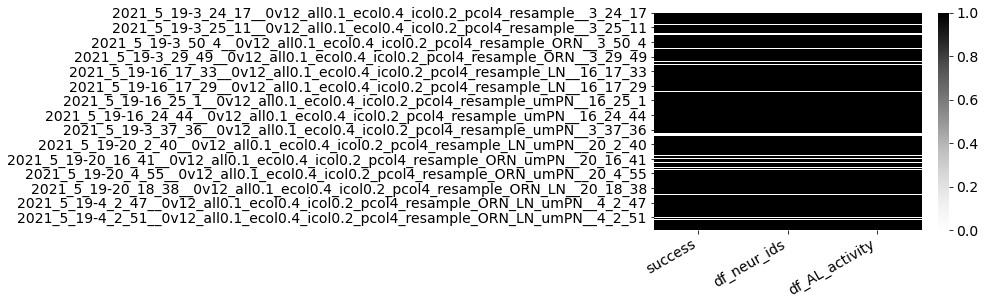

In [8]:
sim_info_fields = np.array(['success', 'df_neur_ids', 'df_AL_activity'])
success_pos = np.where(sim_info_fields == 'success')[0][0]

df_sim_info = []
for i in range(len(all_sims)):
    s = all_sims[i]
    sim_keys = list(d_sims[s].keys())
    present_keys = [f in sim_keys for f in sim_info_fields]
    present_keys[success_pos] = d_sims[s]['success']
    #r = pd.Series(present_keys, name=all_sims_short_names[i]).T
    r = pd.Series(present_keys, name=s).T
    df_sim_info.append(r)
df_sim_info = pd.concat(df_sim_info, 1).T
df_sim_info.columns = sim_info_fields
df_sim_info = df_sim_info.astype(int)

plt.figure()
sns.heatmap(df_sim_info, cmap='Greys')
plt.xticks(rotation=30, ha='right')
plt.show()

In [9]:
df_sim_info.iloc[:5]

,success,df_neur_ids,df_AL_activity
2021_5_19-3_24_17__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample__3_24_17,1,1,1
2021_5_19-3_46_20__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample__3_46_20,1,1,1
2021_5_19-3_23_52__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample__3_23_52,0,0,0
2021_5_19-3_26_35__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample__3_26_35,1,1,1
2021_5_19-3_23_22__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample__3_23_22,1,1,1


In [10]:
list_of_sets_good_sims = [df_sim_info[(df_sim_info.success == 1) & 
                                      (df_sim_info.index.isin(cur_set))].index.values \
                          for cur_set in list_of_sets]
all_good_sims = np.concatenate(list_of_sets_good_sims)
all_good_sims_short_names = np.concatenate([[set_names[i]]*len(list_of_sets_good_sims[i])\
                                            for i in range(len(list_of_sets_good_sims))])

In [11]:
[len(x) for x in list_of_sets_good_sims], len(all_good_sims)

([73, 145, 149, 153, 84, 88, 98, 150], 940)

In [12]:
#df_char_ids = d_sims[good_orn_set[0]]['df_char_ids']
#hemi_gloms = df_char_ids[df_char_ids['altype'] == 'ORN']['glom'].unique()
hemi_gloms = np.array(['DA1', 'VC5', 'VA1v', 'VA1d', 'VA2', 'VA6', 'DM1', 'DL3', 'DL1',
       'VL2a', 'VM4', 'VM5d', 'DM2', 'VL1', 'DM3', 'DM4', 'DM6', 'DL4',
       'VC3l', 'DC3', 'VM7d', 'V', 'VL2p', 'VM1', 'VC3m', 'DC1', 'DL5',
       'D', 'DP1m', 'VM5v', 'DA3', 'VC4', 'DA2', 'VA7m', 'VA3', 'DP1l',
       'DC4', 'VC2', 'VA4', 'DC2', 'VM7v', 'DM5', 'DL2v', 'VM3', 'VC1',
       'VA5', 'DL2d', 'VA7l', 'DA4l', 'DA4m', 'VM2'])

thermo_hygro_glomeruli = np.array(['VP1d', 'VP1l', 'VP1m', 'VP2', 'VP3', 'VP4', 'VP5'])

In [13]:
mac_odors = np.array(['3-octanol',
                        '1-hexanol',
                        'ethyl lactate',
                        #'citronella',
                        '2-heptanone',
                        '1-pentanol',
                        'ethanol',
                        'geranyl acetate',
                        'hexyl acetate',
                        '4-methylcyclohexanol',
                        'pentyl acetate',
                        '1-butanol'])

odor_names = mac_odors

## retrieve PN PC2 loadings, from MAC

MAC_gloms = ['DC2', 'DL5', 'DM1', 'DM2', 'DM3']

MAC_loadings = pd.read_csv(os.path.join(project_dir, 'datasets/MAC/PN_PC2_loadings.csv'))
MAC_loadings_glom_by_odor = MAC_loadings.pivot('glom', 'odor', 'loading').loc[MAC_gloms, odor_names]
MAC_loadings_glom_by_odor

odor,3-octanol,1-hexanol,ethyl lactate,2-heptanone,1-pentanol,ethanol,geranyl acetate,hexyl acetate,4-methylcyclohexanol,pentyl acetate,1-butanol
glom,,,,,,,,,,,
DC2,0.375000,0.906250,0.656250,0.500000,0.833333,0.062500,0.260417,0.343750,0.697917,0.604167,0.802083
DL5,0.114583,0.177083,0.104167,0.041667,0.135417,-0.052083,0.052083,0.104167,0.041667,0.010417,0.031250
DM1,0.125000,0.135417,0.010417,0.052083,0.093750,-0.010417,0.145833,0.052083,-0.020833,0.000000,0.125000
DM2,-0.468750,-0.156250,-0.833333,-0.541667,-0.500000,-0.031250,-0.510417,-0.822917,-0.041667,-0.666667,-0.614583
DM3,-0.072917,0.062500,-0.031250,-0.135417,0.083333,0.135417,-0.052083,-0.010417,0.145833,0.020833,0.281250


In [14]:
def get_sim_MAC_responses(df_AL_activity, sub_pre=0):
    df_orn_frs_onoff, df_upn_frs_onoff = make_orn_upn_frs(df_AL_activity, odor_names, df_neur_ids.reset_index(),
                                                          sub_pre=sub_pre, olf_only=1)
    df_orn_glom_onoff, df_upn_glom_onoff = \
            make_glomerular_odor_responses(df_orn_frs_onoff, df_upn_frs_onoff, df_AL_activity)

    return df_upn_glom_onoff.loc[MAC_gloms, odor_names]

In [41]:
list_of_PN_PC2_projections_by_set = []
list_of_DC2_DM2_diffs_by_set = []
list_of_df_sim_MAC_frs = []
list_of_df_responses_resamples = []

for i in range(len(list_of_sets_good_sims)):
    good_set = list_of_sets_good_sims[i]
    print(set_names[i])
    good_set_PN_PC2_projections = []
    good_set_DC2_DM2_diffs = []
    good_set_df_sim_MAC_frs = []
    
    for k in good_set:
        d_ind_sim = d_sims[k]
        df_AL_activity = d_ind_sim['df_AL_activity']
        
        # get multiplication with loadings      

        calc_min = 0; calc_max = 1.65
        
        df_sim_MAC_frs = get_sim_MAC_responses(df_AL_activity, sub_pre=1)
        df_sim_MAC_frs_scaled = df_sim_MAC_frs - min(df_sim_MAC_frs.values.flatten())
        df_sim_MAC_frs_scaled = df_sim_MAC_frs_scaled / 400 * calc_max
        good_set_df_sim_MAC_frs.append(df_sim_MAC_frs)
        
        sim_PN_PC2_projection = df_sim_MAC_frs_scaled.multiply(MAC_loadings_glom_by_odor).sum().sum()       
        sim_DC2_DM2_diff = np.sum(df_sim_MAC_frs.loc['DC2'] - df_sim_MAC_frs.loc['DM2'])
        
        good_set_PN_PC2_projections.append(sim_PN_PC2_projection)
        good_set_DC2_DM2_diffs.append(sim_DC2_DM2_diff)
    
    df_odor_glom_responses_resampling_set = pd.concat(
        [pd.melt(xx.reset_index(), 
                 id_vars='glom', var_name='odor', value_name='fr')
         .set_index(['glom', 'odor']) \
         for xx in good_set_df_sim_MAC_frs], 1)
    df_odor_glom_responses_resampling_set.columns = [f'simfly{i}' for i in range(df_odor_glom_responses_resampling_set.shape[1])]
    
    list_of_df_responses_resamples.append(df_odor_glom_responses_resampling_set)
    list_of_PN_PC2_projections_by_set.append(np.array(good_set_PN_PC2_projections))
    list_of_DC2_DM2_diffs_by_set.append(np.array(good_set_DC2_DM2_diffs))
    

No resampling
+ ORN
+ LN
+ PN
+ LN + PN
+ ORN + PN
+ ORN + LN
+ ORN + LN + PN


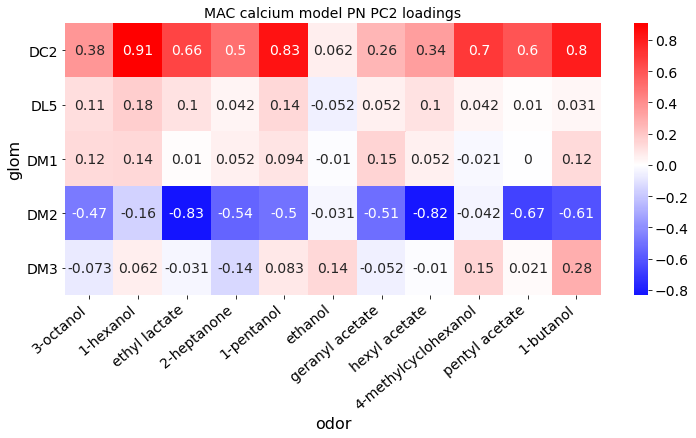

In [43]:
plt.figure(figsize=(12,5))
sns.heatmap(MAC_loadings_glom_by_odor, annot=True, center=0, cmap='bwr')
plt.yticks(rotation=0); plt.xticks(rotation=40, ha='right')
plt.title('MAC calcium model PN PC2 loadings')
plt.show()

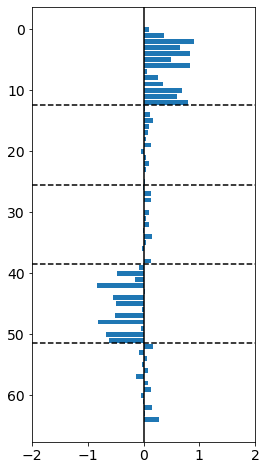

In [44]:
df_loadings = MAC_loadings.set_index(['glom', 'odor'])

fig, ax = plt.subplots(figsize=(4,8))
ax.barh(np.arange(len(df_loadings)), df_loadings.values[:, 0])
ax.invert_yaxis()
for i in range(1, 13*5):
    if i % 13 == 0:
        ax.axhline(i-0.5, ls='--', c='k')
ax.axvline(0, c='k')
ax.set_xlim(-2, 2)
plt.show()

In [45]:
df_MAC_responses = pd.read_csv(os.path.join(project_dir, 'datasets/MAC/responsesNoResponseRemoved.csv'), header=None)
gNames = ['DC2', 'DL5', 'DM1', 'DM2', 'DM3']
oNames = np.array(['air', '3-octanol', '1-hexanol','ethyl lactate',
                      'citronella','2-heptanone','1-pentanol',
                        'ethanol','geranyl acetate','hexyl acetate',
                        '4-methylcyclohexanol', 'pentyl acetate', '1-butanol'])
df_MAC_responses.columns = [f'fly{c}' for c in df_MAC_responses.columns]

In [46]:
df_MAC_responses['glom'] = np.repeat(gNames, 13)
df_MAC_responses['odor'] = np.tile(oNames, 5)

In [47]:
df_MAC_responses = df_MAC_responses.set_index(['glom', 'odor'])

In [48]:
odor_names

array(['3-octanol', '1-hexanol', 'ethyl lactate', '2-heptanone',
       '1-pentanol', 'ethanol', 'geranyl acetate', 'hexyl acetate',
       '4-methylcyclohexanol', 'pentyl acetate', '1-butanol'],
      dtype='<U20')

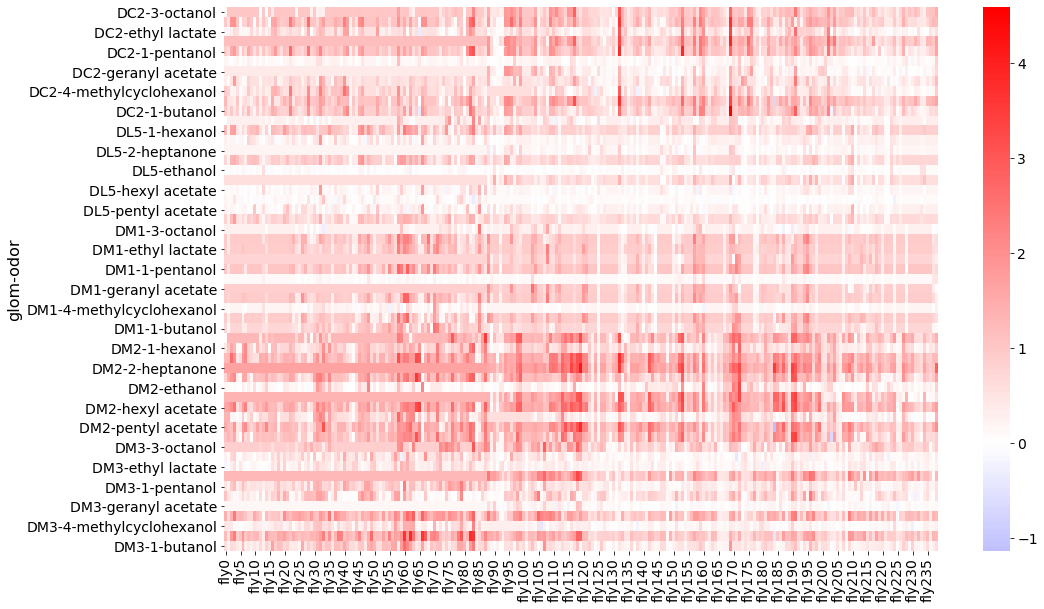

In [49]:
plt.figure(figsize=(16,10))
sns.heatmap(df_MAC_responses.loc[(gNames, odor_names), :], cmap='bwr', center=0)
plt.show()

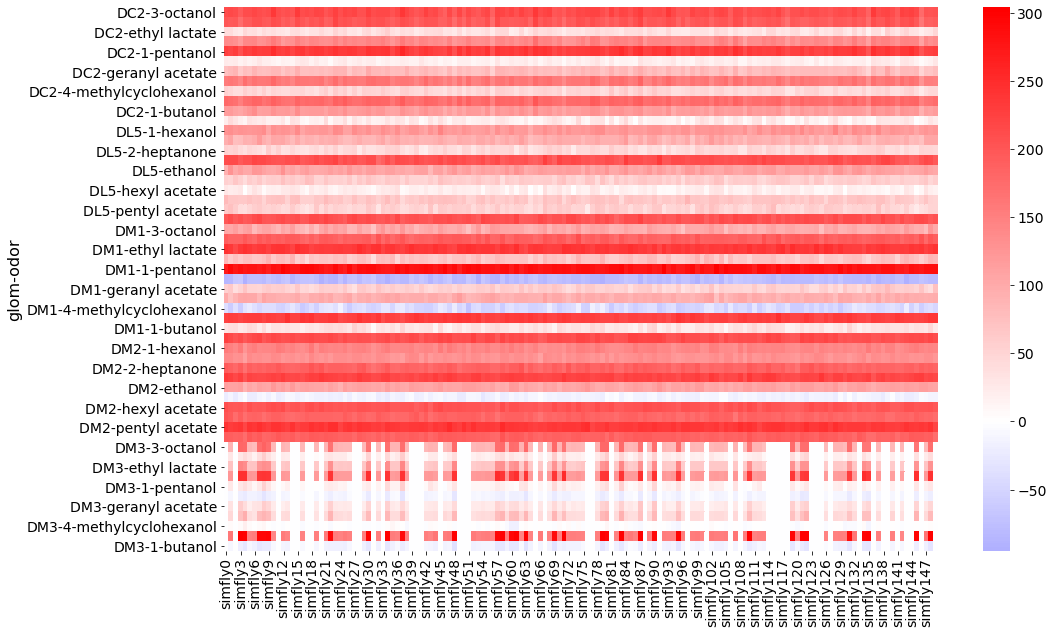

In [70]:
plt.figure(figsize=(16,10))
sns.heatmap(df_odor_glom_responses_resampling_set.loc[(gNames, odor_names), :], cmap='bwr', center=0)
plt.show()

In [52]:
fly_responses_df_MAC = df_MAC_responses.loc[(gNames, odor_names), :]
fly_responses_MAC = fly_responses_df_MAC.T.values

pca_MAC = PCA()
pca_MAC.fit(fly_responses_MAC)

pca_scores_MAC = pca_MAC.transform(fly_responses_MAC)
pca_loadings_MAC = pca_MAC.components_.T


fly_responses_df_sim = df_odor_glom_responses_resampling_set.loc[(gNames, odor_names), :]
fly_responses_sim = fly_responses_df_sim.T.values

pca_sim = PCA()
pca_sim.fit(fly_responses_sim)

pca_scores_sim = pca_sim.transform(fly_responses_sim)
pca_loadings_sim = pca_sim.components_.T

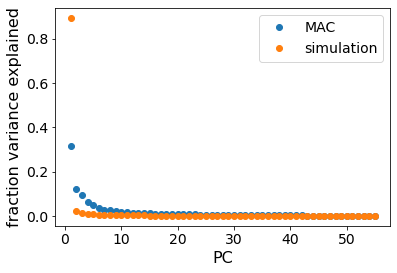

In [53]:
plt.figure()
plt.plot(1+np.arange(pca_MAC.n_components_), pca_MAC.explained_variance_ratio_, 'o', label='MAC')
plt.plot(1+np.arange(pca_sim.n_components_), pca_sim.explained_variance_ratio_, 'o', label='simulation')
plt.xlabel('PC'); plt.ylabel('fraction variance explained')
plt.legend()
plt.show()

In [54]:
fly_responses_gloms_MAC = fly_responses_df_MAC.reset_index()['glom']
fly_responses_odors_MAC = fly_responses_df_MAC.reset_index()['odor']

fly_responses_gloms_sim = fly_responses_df_sim.reset_index()['glom']
fly_responses_odors_sim = fly_responses_df_sim.reset_index()['odor']

In [58]:
glom_colors = {MAC_gloms[i]: f'C{i}' for i in range(len(MAC_gloms))}

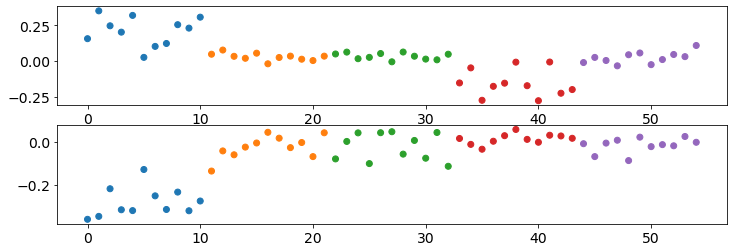

In [65]:
fig, axs = plt.subplots(2, 1, figsize=(12, 4))
axs[0].scatter(np.arange(len(pca_loadings_MAC)), pca_loadings_MAC[:, 1], c=[glom_colors[x] for x in fly_responses_gloms_MAC])
axs[1].scatter(np.arange(len(pca_loadings_sim)), pca_loadings_sim[:, 1], c=[glom_colors[x] for x in fly_responses_gloms_sim])
plt.show()

In [66]:
pca_loadings_df_MAC = pd.DataFrame(pca_loadings_MAC, 
                                   index=fly_responses_df_MAC.index, 
                                   columns=[f'PC{i+1}' for i in range(pca_loadings_MAC.shape[1])])

pca_loadings_df_sim = pd.DataFrame(pca_loadings_sim, 
                                   index=fly_responses_df_sim.index, 
                                   columns=[f'PC{i+1}' for i in range(pca_loadings_sim.shape[1])])

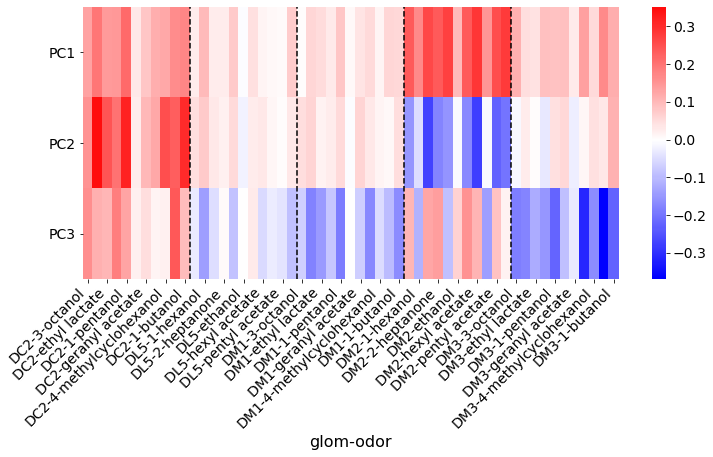

In [67]:
plt.figure(figsize=(12,5))
sns.heatmap(pca_loadings_df_MAC.iloc[:, :3].T, cmap='bwr', center=0)
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
for i in np.arange(11, 55, 11):
    plt.axvline(i, ls='--', c='k')
plt.show()

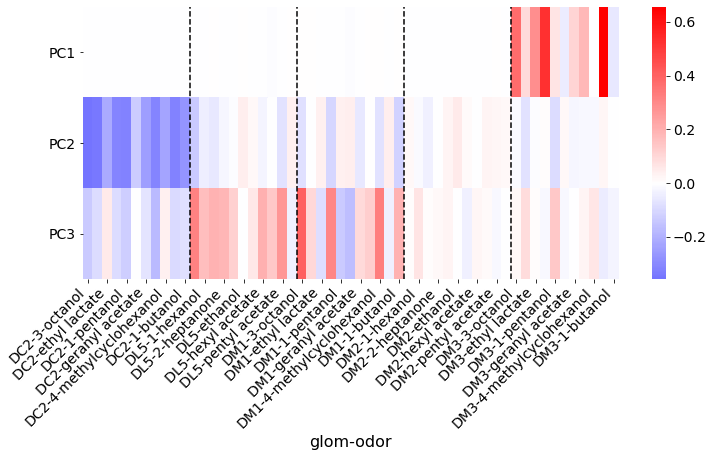

In [68]:
plt.figure(figsize=(12,5))
sns.heatmap(pca_loadings_df_sim.iloc[:, :3].T, cmap='bwr', center=0)
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
for i in np.arange(11, 55, 11):
    plt.axvline(i, ls='--', c='k')
plt.show()

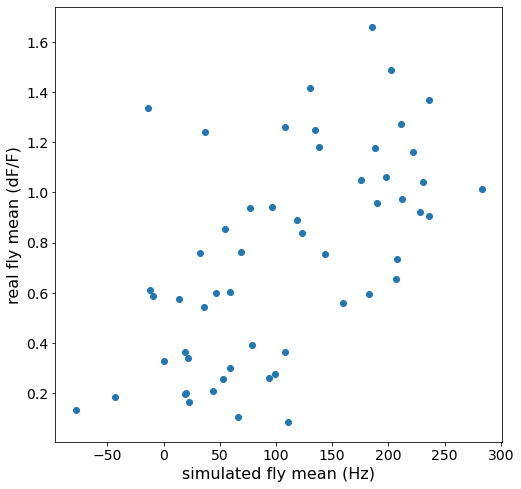

In [71]:
plt.figure(figsize=(8,8))
plt.scatter(df_odor_glom_responses_resampling_set.loc[(gNames, odor_names), :].mean(1),
    df_MAC_responses.loc[(gNames, odor_names), :].mean(1))
plt.xlabel('simulated fly mean (Hz)')
plt.ylabel('real fly mean (dF/F)')
plt.show()

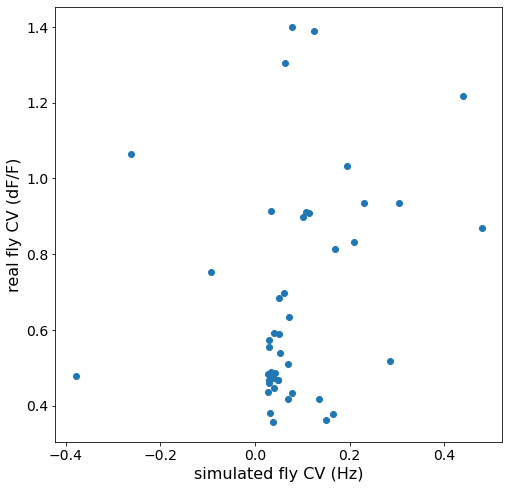

In [72]:
plt.figure(figsize=(8,8))
plt.scatter(df_odor_glom_responses_resampling_set.loc[(gNames[:-1], odor_names), :].std(1) / df_odor_glom_responses_resampling_set.loc[(gNames[:-1], odor_names), :].mean(1),
    df_MAC_responses.loc[(gNames[:-1], odor_names), :].std(1) / df_MAC_responses.loc[(gNames[:-1], odor_names), :].mean(1))
plt.xlabel('simulated fly CV (Hz)')
plt.ylabel('real fly CV (dF/F)')
plt.show()

In [73]:
dfx = df_odor_glom_responses_resampling_set.loc[(gNames[:-1], odor_names), :].std(1)
dfx[dfx > 11]

glom  odor                
DM1   3-octanol               11.264111
      4-methylcyclohexanol    11.281711
dtype: float64

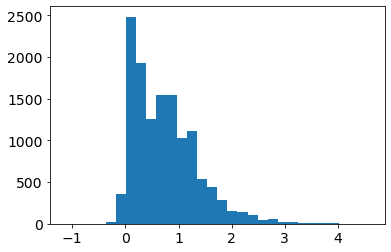

In [74]:
plt.figure()
plt.hist(df_MAC_responses.loc[(gNames, odor_names), :].values.flatten(), bins=30)
plt.show()

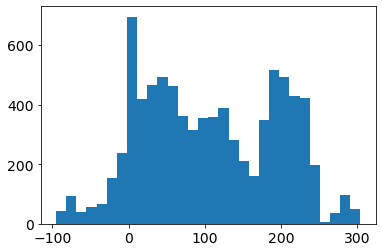

In [47]:
plt.figure()
plt.hist(df_odor_glom_responses_resampling_set.loc[(gNames, odor_names), :].values.flatten(), bins=30)
plt.show()

In [48]:
df_neur_ids[df_neur_ids.altype == 'ORN']['glom'].value_counts()

DA1     142
VC5     138
VA1v    116
VA1d    104
VA2      97
VA6      91
DM1      86
DL3      86
DL1      84
VL2a     83
VM4      81
VM5d     80
DM2      79
VL1      78
DM3      68
DM4      60
DM6      60
DL4      59
VC3l     45
DC3      44
VM7d     43
V        41
VM1      40
VC3m     39
VL2p     39
D        38
DL5      38
DC1      38
DA3      36
VM5v     36
DP1m     36
DA2      35
VC4      35
VA7m     34
VA3      32
DP1l     29
DC4      29
VC2      28
VA4      28
DC2      27
VM7v     27
DL2v     24
DM5      23
VM3      19
VC1      18
VA5      17
DL2d     16
VA7l     16
DA4l     15
DA4m     12
VM2       1
Name: glom, dtype: int64

In [49]:
from utils.plot_utils import plot_value_counts_of_series

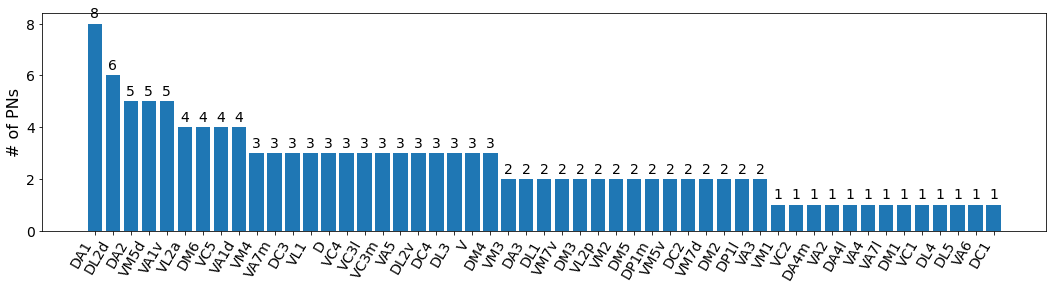

In [50]:
plt.figure(figsize=(18,4))
plot_value_counts_of_series(df_neur_ids[df_neur_ids.altype == 'uPN']['glom'], num_label=True)
plt.xticks(rotation=60, ha='right')
plt.ylabel('# of PNs')
plt.show()

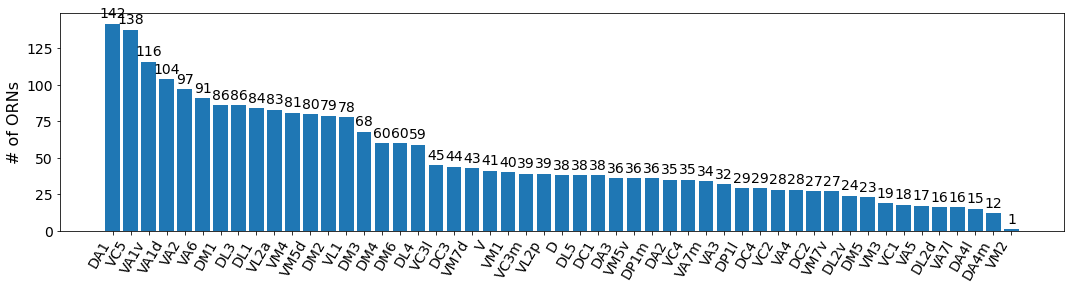

In [51]:
plt.figure(figsize=(18,4))
plot_value_counts_of_series(df_neur_ids[df_neur_ids.altype == 'ORN']['glom'], num_label=True)
plt.xticks(rotation=60, ha='right')
plt.ylabel('# of ORNs')
plt.show()

In [52]:
calc_min = 0; calc_max = 1.65
        
df_sim_MAC_frs = get_sim_MAC_responses(df_AL_activity)
df_sim_MAC_frs_scaled = df_sim_MAC_frs - min(df_sim_MAC_frs.values.flatten())
df_sim_MAC_frs_scaled = df_sim_MAC_frs_scaled / 400 * calc_max

In [76]:
mat_MAC = df_MAC_responses.loc[(gNames, odor_names), :].T.values
mat_MAC.shape

(239, 55)

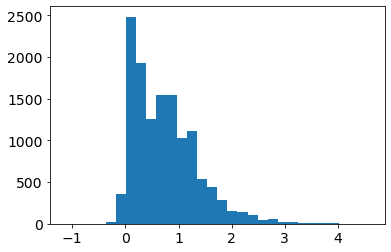

In [77]:
plt.figure()
plt.hist(mat_MAC.flatten(), bins=30)
plt.show()

In [78]:
xmac = mat_MAC.flatten()

In [79]:
xmac.mean()

0.7399909043857633

In [80]:
xmac.std()

0.6110617087205901

In [81]:
xsim = df_sim_MAC_frs.values

In [82]:
calc_transformed = ((xsim - np.mean(xsim)) / np.std(xsim)) * np.std(xmac) + np.mean(xmac)

(array([ 2.,  1., 14.,  7.,  5.,  6.,  6.,  7.,  6.,  1.]),
 array([-0.47308491, -0.22314019,  0.02680453,  0.27674925,  0.52669397,
         0.77663869,  1.02658341,  1.27652813,  1.52647285,  1.77641757,
         2.02636229]),
 <BarContainer object of 10 artists>)

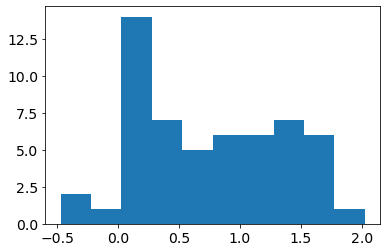

In [83]:
plt.hist(calc_transformed.flatten())

In [84]:
pca = PCA()
pca.fit(mat_MAC)

SCORE = pca.transform(mat_MAC)
COEFF = pca.components_.T

In [85]:
SCORE.shape

(239, 55)

In [86]:
COEFF.shape

(55, 55)

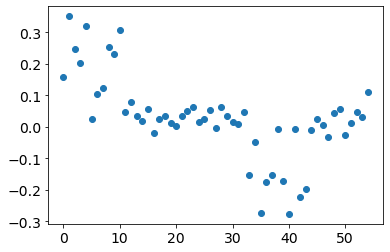

In [87]:
plt.plot(COEFF[:, 1], 'o')

In [88]:
pc2_loadings = COEFF[:, 1]

ValueError: x and y must have same first dimension, but have shapes (55,) and (65,)

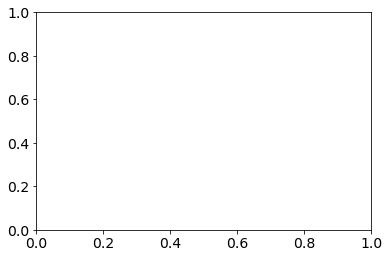

In [89]:
plt.plot(COEFF[:, 1], df_loadings.values[:, 0], 'o')

In [90]:
mat_MAC.shape

(239, 55)

In [91]:
df_loadings

loading
glom odor                          
DC2  air                   0.093750
     3-octanol             0.375000
     1-hexanol             0.906250
     ethyl lactate         0.656250
     citronella            0.833333
...                             ...
DM3  geranyl acetate      -0.052083
     hexyl acetate        -0.010417
     4-methylcyclohexanol  0.145833
     pentyl acetate        0.020833
     1-butanol             0.281250

[65 rows x 1 columns]

In [92]:
MAC_loadings_glom_by_odor.values.flatten()

array([ 0.375     ,  0.90625   ,  0.65625   ,  0.5       ,  0.83333333,
        0.0625    ,  0.26041667,  0.34375   ,  0.69791667,  0.60416667,
        0.80208333,  0.11458333,  0.17708333,  0.10416667,  0.04166667,
        0.13541667, -0.05208333,  0.05208333,  0.10416667,  0.04166667,
        0.01041667,  0.03125   ,  0.125     ,  0.13541667,  0.01041667,
        0.05208333,  0.09375   , -0.01041667,  0.14583333,  0.05208333,
       -0.02083333,  0.        ,  0.125     , -0.46875   , -0.15625   ,
       -0.83333333, -0.54166667, -0.5       , -0.03125   , -0.51041667,
       -0.82291667, -0.04166667, -0.66666667, -0.61458333, -0.07291667,
        0.0625    , -0.03125   , -0.13541667,  0.08333333,  0.13541667,
       -0.05208333, -0.01041667,  0.14583333,  0.02083333,  0.28125   ])

## record firing rate activity during odors

In [93]:
df_AL_activity

,neur_name,neur_type,fr_pre_odor0,fr_dur_odor0,fr_pre_odor1,fr_dur_odor1,fr_pre_odor2,fr_dur_odor2,fr_pre_odor3,fr_dur_odor3,...,fr_dur_odor6,fr_pre_odor7,fr_dur_odor7,fr_pre_odor8,fr_dur_odor8,fr_pre_odor9,fr_dur_odor9,fr_pre_odor10,fr_dur_odor10,glom
0,ORN_DA1_0,ORN,4.0,117.5,8.0,92.5,16.0,32.5,0.0,45.0,...,0.0,8.0,22.5,12.0,20.0,4.0,45.0,12.0,25.0,DA1
1,ORN_DA1_1,ORN,8.0,100.0,12.0,92.5,12.0,30.0,8.0,42.5,...,0.0,8.0,22.5,16.0,30.0,12.0,52.5,8.0,10.0,DA1
2,ORN_DA1_2,ORN,20.0,85.0,8.0,92.5,4.0,32.5,16.0,42.5,...,7.5,8.0,22.5,8.0,20.0,4.0,25.0,0.0,20.0,DA1
3,ORN_DA1_3,ORN,8.0,112.5,4.0,80.0,16.0,35.0,12.0,45.0,...,0.0,12.0,20.0,16.0,7.5,8.0,57.5,4.0,12.5,DA1
4,ORN_DA1_4,ORN,0.0,95.0,0.0,87.5,4.0,32.5,8.0,57.5,...,0.0,16.0,37.5,4.0,22.5,0.0,37.5,0.0,12.5,DA1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057,mPN_160,mPN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3058,mPN_161,mPN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3059,mPN_162,mPN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3060,mPN_163,mPN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [94]:
df_odor_glom_responses_resampling_set

,,simfly0,simfly1,simfly2,simfly3,simfly4,simfly5,simfly6,simfly7,simfly8,simfly9,...,simfly140,simfly141,simfly142,simfly143,simfly144,simfly145,simfly146,simfly147,simfly148,simfly149
glom,odor,,,,,,,,,,,,,,,,,,,,,
DC2,3-octanol,212.5,216.25,213.50,195.0,210.50,211.00,219.50,211.0,207.25,212.50,...,213.50,195.0,225.00,221.75,225.00,216.00,177.50,205.00,202.5,205.0
DL5,3-octanol,23.0,44.00,32.00,21.0,13.50,33.00,31.00,23.5,31.00,18.00,...,27.00,25.0,27.50,34.00,25.50,0.00,8.50,18.50,31.5,22.5
DM1,3-octanol,107.5,103.50,114.50,97.0,111.00,116.50,82.50,98.0,109.00,108.00,...,109.00,102.0,93.00,118.50,101.50,93.00,96.00,79.50,122.0,100.0
DM2,3-octanol,226.0,216.75,205.50,214.0,197.50,209.25,217.25,220.5,200.50,209.25,...,209.00,200.5,208.00,213.00,216.75,214.75,216.25,209.50,219.5,213.5
DM3,3-octanol,0.0,88.75,0.00,181.5,180.50,86.00,81.00,171.5,186.00,172.50,...,85.00,0.0,87.25,0.00,0.00,163.50,0.00,83.50,170.0,0.0
DC2,1-hexanol,201.0,195.75,197.25,176.0,196.25,195.75,207.00,207.5,197.25,196.00,...,201.75,188.5,207.00,204.50,212.50,198.25,163.50,191.00,188.5,193.5
DL5,1-hexanol,130.5,135.00,124.50,129.0,126.50,124.50,126.50,129.0,136.00,106.00,...,129.50,123.5,121.50,114.00,122.00,105.00,120.00,127.50,120.5,123.5
DM1,1-hexanol,193.5,182.50,185.00,185.5,196.50,186.00,180.00,197.0,188.50,198.00,...,190.00,193.0,180.00,188.00,194.00,182.50,205.00,178.00,200.5,191.5
DM2,1-hexanol,158.0,150.25,140.50,158.0,127.00,146.50,153.75,141.5,144.50,144.75,...,149.00,131.5,136.50,145.00,150.50,154.75,145.25,141.50,145.5,144.5


In [95]:
xx = good_set_df_sim_MAC_frs[0]

In [96]:
dfy = pd.concat([xx.stack() for xx in good_set_df_sim_MAC_frs], 1).T

In [97]:
dfy.values

array([[212.5 , 201.  ,  41.  , ...,   0.  ,   0.  ,   0.  ],
       [216.25, 195.75,  41.25, ...,   5.  , 160.25, -10.75],
       [213.5 , 197.25,  29.5 , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [205.  , 191.  ,  30.75, ...,   2.5 , 164.  , -16.  ],
       [202.5 , 188.5 ,  32.5 , ...,   4.  , 304.  , -32.  ],
       [205.  , 193.5 ,  48.5 , ...,   0.  ,   0.  ,   0.  ]])

(array([ 42.,  94.,  39.,  56.,  67., 155., 237., 695., 418., 465., 491.,
        463., 361., 316., 355., 358., 389., 282., 212., 160., 349., 517.,
        493., 430., 423., 196.,   5.,  36.,  95.,  51.]),
 array([-95. , -81.7, -68.4, -55.1, -41.8, -28.5, -15.2,  -1.9,  11.4,
         24.7,  38. ,  51.3,  64.6,  77.9,  91.2, 104.5, 117.8, 131.1,
        144.4, 157.7, 171. , 184.3, 197.6, 210.9, 224.2, 237.5, 250.8,
        264.1, 277.4, 290.7, 304. ]),
 <BarContainer object of 30 artists>)

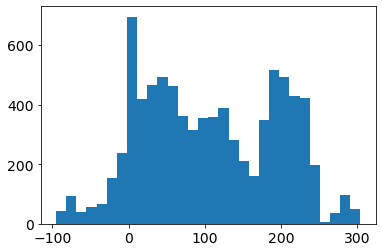

In [98]:
plt.hist(dfy.values.flatten(), bins=30)

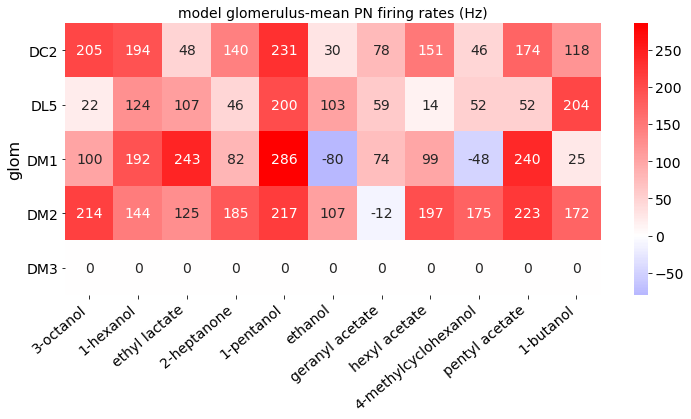

In [99]:
#df_sim_MAC_frs = sim_MAC_responses
plt.figure(figsize=(12,5))
sns.heatmap(df_sim_MAC_frs, annot=True, cmap='bwr', fmt='.0f', center=0)
plt.yticks(rotation=0); plt.xticks(rotation=40, ha='right')
plt.title('model glomerulus-mean PN firing rates (Hz)')
plt.show()

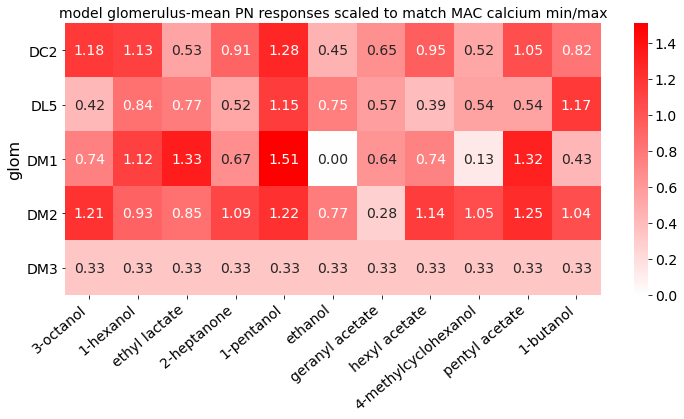

In [100]:
#calc_min = 0; calc_max = 1.65
#df_sim_MAC_frs = sim_MAC_responses/0.4
#df_sim_MAC_frs_scaled = df_sim_MAC_frs - min(df_sim_MAC_frs.values.flatten())
#df_sim_MAC_frs_scaled = df_sim_MAC_frs_scaled / max(df_sim_MAC_frs_scaled.values.flatten()) * calc_max

plt.figure(figsize=(12,5))
sns.heatmap(df_sim_MAC_frs_scaled, annot=True, cmap='bwr', fmt='.2f', center=0)
plt.yticks(rotation=0); plt.xticks(rotation=40, ha='right')
plt.title('model glomerulus-mean PN responses scaled to match MAC calcium min/max')
plt.show()

## record connectivity matrix columns

In [23]:
sim_orn_pos = np.where(ind_df_neur_ids.altype == 'ORN')[0]
sim_ln_pos = np.where(ind_df_neur_ids.altype == 'LN')[0]
sim_upn_pos = np.where((ind_df_neur_ids.altype == 'uPN') & ~(ind_df_neur_ids.glom.isin(thermo_hygro_glomeruli)))[0]
sim_mpn_pos = np.where(ind_df_neur_ids.altype == 'mPN')[0]

In [24]:
orn_input_vecs_by_set = []
ln_input_vecs_by_set = []
pn_input_vecs_by_set = []
for i in range(len(list_of_bodyIds_by_set)):
    print(set_names[i])
    cur_set = list_of_bodyIds_by_set[i]
    set_orn_input_vecs = [al_block.loc[cur_arr, cur_arr[sim_orn_pos]].sum(0).values for cur_arr in cur_set]
    orn_input_vecs_by_set.append(set_orn_input_vecs)
    set_ln_input_vecs = [al_block.loc[cur_arr, cur_arr[sim_ln_pos]].sum(0).values for cur_arr in cur_set]
    ln_input_vecs_by_set.append(set_ln_input_vecs)
    set_pn_input_vecs = [al_block.loc[cur_arr, cur_arr[sim_upn_pos]].sum(0).values for cur_arr in cur_set]
    pn_input_vecs_by_set.append(set_pn_input_vecs)
    
orn_input_vecs_by_set = np.array(orn_input_vecs_by_set)
ln_input_vecs_by_set = np.array(ln_input_vecs_by_set)    
pn_input_vecs_by_set = np.array(pn_input_vecs_by_set)

No resampling
+ ORN
+ LN
+ PN
+ LN + PN
+ ORN + PN
+ ORN + LN
+ ORN + LN + PN


C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app
C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

## compute pairwise distances

In [25]:
dist_metric = 'euclidean'

pairwise_pn_glom_by_odor_activity_dists = []
dists_to_mean_pn_glom_by_odor_activity = []
for t in list_of_pn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, nglom*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_pn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_pn_glom_by_odor_activity.append(t_dists_to_mean)
    
pairwise_pn_individ_by_odor_activity_dists = []
dists_to_mean_pn_individ_by_odor_activity = []
for t in list_of_pn_individ_tensors_good_set:
    nsim_in_t, n_pns, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, n_pns*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_pn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_pn_individ_by_odor_activity.append(t_dists_to_mean)
    
pairwise_ln_individ_by_odor_activity_dists = []
dists_to_mean_ln_individ_by_odor_activity = []
for t in list_of_ln_individ_tensors_good_set:
    nsim_in_t, n_lns, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, n_lns*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_ln_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_ln_individ_by_odor_activity.append(t_dists_to_mean)
    
pairwise_orn_glom_by_odor_activity_dists = []
dists_to_mean_orn_glom_by_odor_activity = []
for t in list_of_orn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, nglom*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_orn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_orn_glom_by_odor_activity.append(t_dists_to_mean)
    
pairwise_orn_individ_by_odor_activity_dists = []
dists_to_mean_orn_individ_by_odor_activity = []
for t in list_of_orn_individ_tensors_good_set:
    nsim_in_t, n_orns, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, n_orns*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_orn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_orn_individ_by_odor_activity.append(t_dists_to_mean)

In [26]:
### PAIRWISE DISTANCES OF Z SCORED DISTANCES

dist_metric = 'euclidean'

pairwise_Z_pn_glom_by_odor_activity_dists = []
dists_to_mean_Z_pn_glom_by_odor_activity = []
for t in list_of_pn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    z = t.reshape((nsim_in_t, nglom*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_pn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_pn_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_pn_individ_by_odor_activity_dists = []
dists_to_mean_Z_individ_glom_by_odor_activity = []
for t in list_of_pn_individ_tensors_good_set:
    nsim_in_t, n_pns, nodors = t.shape
    z = t.reshape((nsim_in_t, n_pns*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_pn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_individ_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_ln_individ_by_odor_activity_dists = []
dists_to_mean_Z_ln_individ_glom_by_odor_activity = []
for t in list_of_ln_individ_tensors_good_set:
    nsim_in_t, n_lns, nodors = t.shape
    z = t.reshape((nsim_in_t, n_lns*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_ln_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_ln_individ_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_orn_glom_by_odor_activity_dists = []
dists_to_mean_Z_orn_glom_by_odor_activity = []
for t in list_of_orn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    z = t.reshape((nsim_in_t, nglom*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_orn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_orn_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_orn_individ_by_odor_activity_dists = []
dists_to_mean_Z_orn_individ_glom_by_odor_activity = []
for t in list_of_orn_individ_tensors_good_set:
    nsim_in_t, n_orns, nodors = t.shape
    z = t.reshape((nsim_in_t, n_orns*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_orn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_orn_individ_glom_by_odor_activity.append(z_dists_to_mean)

In [27]:
### PAIRWISE DISTANCES ON INPUT CONNECTIVITY

dist_metric = 'euclidean'


pairwise_pn_input_conmat_dists = []
dists_to_mean_pn_input_conmat = []
for t in pn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    t_flat = np.array(t)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_pn_input_conmat_dists.append(t_pdists)
    dists_to_mean_pn_input_conmat.append(t_dists_to_mean)
    
pairwise_ln_input_conmat_dists = []
dists_to_mean_ln_input_conmat = []
for t in ln_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    t_flat = np.array(t)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_ln_input_conmat_dists.append(t_pdists)
    dists_to_mean_ln_input_conmat.append(t_dists_to_mean)
    
pairwise_orn_input_conmat_dists = []
dists_to_mean_orn_input_conmat = []
for t in orn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    t_flat = np.array(t)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_orn_input_conmat_dists.append(t_pdists)
    dists_to_mean_orn_input_conmat.append(t_dists_to_mean)

In [28]:
t = list_of_pn_individ_tensors_good_set[0]
t.shape

(73, 130, 11)

In [29]:
dist_metric = 'euclidean'

pairwise_pn_input_conmat_dists = []
for t in pn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    pairwise_pn_input_conmat_dists.append(t_pdists)
    
pairwise_ln_input_conmat_dists = []
for t in ln_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    pairwise_ln_input_conmat_dists.append(t_pdists)
    
pairwise_orn_input_conmat_dists = []
for t in orn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    pairwise_orn_input_conmat_dists.append(t_pdists)

## plot

In [30]:
def plot_dist_hists(list_of_set_dists, set_names, xlabel, suptit = '', figname = '', dopairs=True):
      
    n_sets = len(list_of_set_dists)
    
    for l in list_of_set_dists:
        l[np.isinf(l)] = 0 # np.nan
    
    min_dist = np.min([np.nanmin(x) for x in list_of_set_dists])
    max_dist = np.max([np.nanmax(x) for x in list_of_set_dists])

    b = np.linspace(min_dist, max_dist, 80)

    cmap = cm.get_cmap('jet')

    fig, axs = plt.subplots(n_sets, 1, figsize=(10,n_sets*2), sharex=True)
    plt.suptitle(suptit, size=16)
    for i in range(len(list_of_set_dists)):
        nsims = len(list_of_set_dists[i])
        if dopairs:
            nsims = int(1/2*((8*nsims+1)**0.5 + 1))
        axs[i].hist(list_of_set_dists[i], label=set_names[i], color=cmap(i/n_sets), bins=b)
        axs[i].axvline(np.mean(list_of_set_dists[i]), ls='--', c='k')
        axs[i].set_title(set_names[i]+f' ({nsims})')
    plt.subplots_adjust(hspace=0.4)
    plt.ylabel('# simulation'+dopairs*' pair'+'s')
    plt.xlabel(xlabel)
    if len(figname) > 0:
        plt.savefig(figname, dpi=400, bbox_inches='tight')
    plt.show()

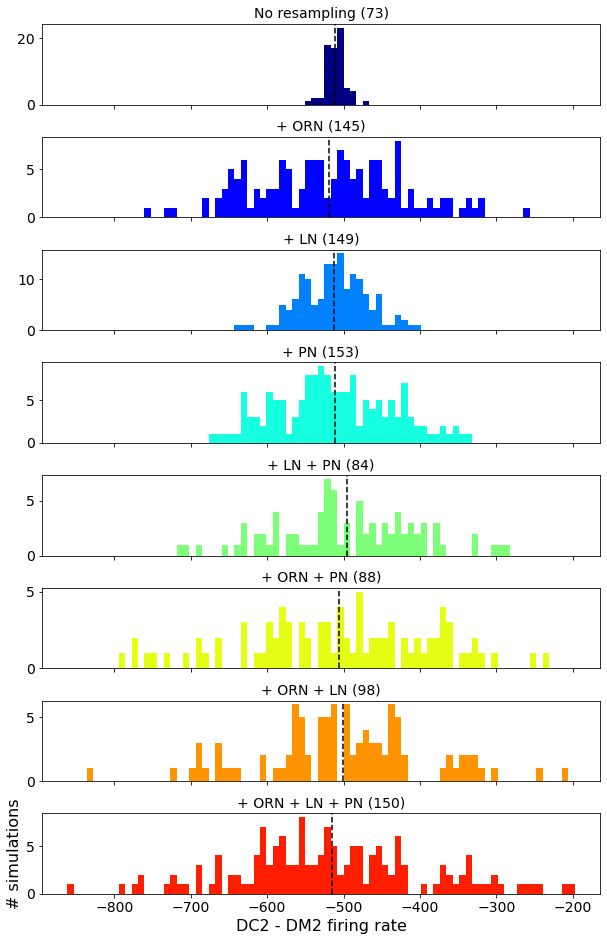

In [32]:
plot_dist_hists(list_of_DC2_DM2_diffs_by_set, set_names, xlabel='DC2 - DM2 firing rate', dopairs=False)

In [33]:
list_of_PN_PC2_projections_by_set[0]

array([0.6104248 , 0.59012207, 0.59087402, 0.54070801, 0.56074219,
       0.57304199, 0.53603516, 0.55182617, 0.64420898, 0.56627441,
       0.51723633, 0.58808105, 0.59592285, 0.54296387, 0.53979492,
       0.54887207, 0.5868457 , 0.58679199, 0.53442383, 0.60929687,
       0.57196777, 0.59495605, 0.56568359, 0.55601562, 0.57782227,
       0.56004394, 0.53630371, 0.55617676, 0.6703125 , 0.57728516,
       0.57416992, 0.59135742, 0.59436523, 0.59952148, 0.57400879,
       0.54011719, 0.59162598, 0.57873535, 0.57422363, 0.56933594,
       0.56246094, 0.49994141, 0.56047363, 0.56632812, 0.53667969,
       0.57615723, 0.57545898, 0.59125   , 0.57647949, 0.58523437,
       0.57298828, 0.55456543, 0.56299805, 0.60542969, 0.52416504,
       0.61590332, 0.53539062, 0.52217773, 0.56417969, 0.54156738,
       0.59500977, 0.58528809, 0.5269043 , 0.58657715, 0.56632812,
       0.60199219, 0.50638672, 0.61176758, 0.58356934, 0.50037109,
       0.58265625, 0.60521484, 0.57202148])

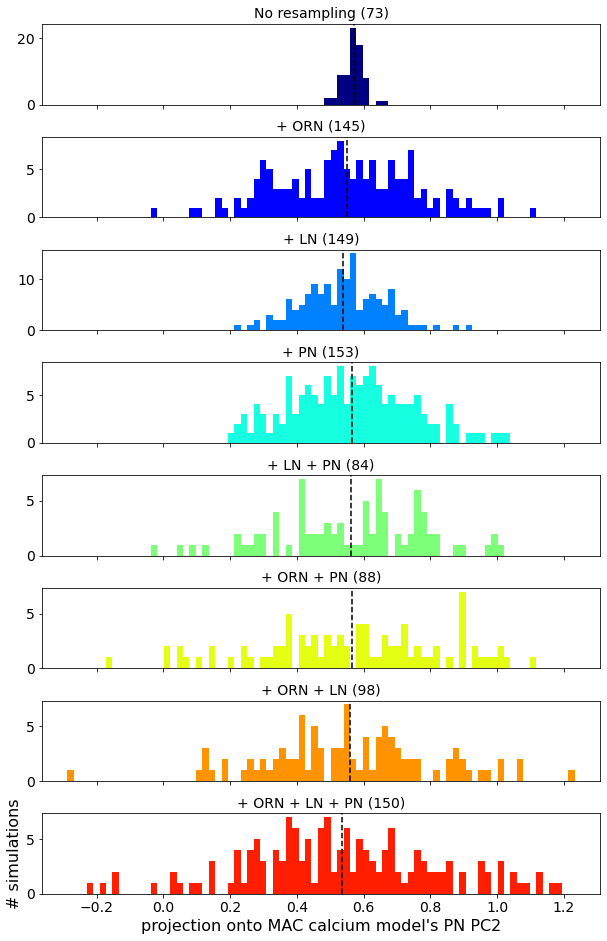

In [35]:
plot_dist_hists(list_of_PN_PC2_projections_by_set, set_names, xlabel='projection onto MAC calcium model\'s PN PC2', dopairs=False)

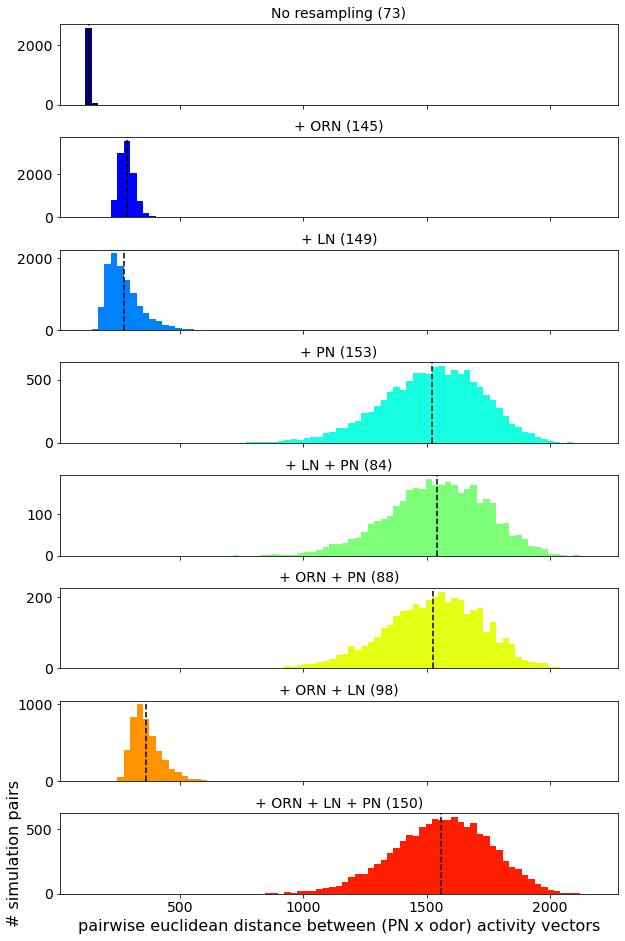

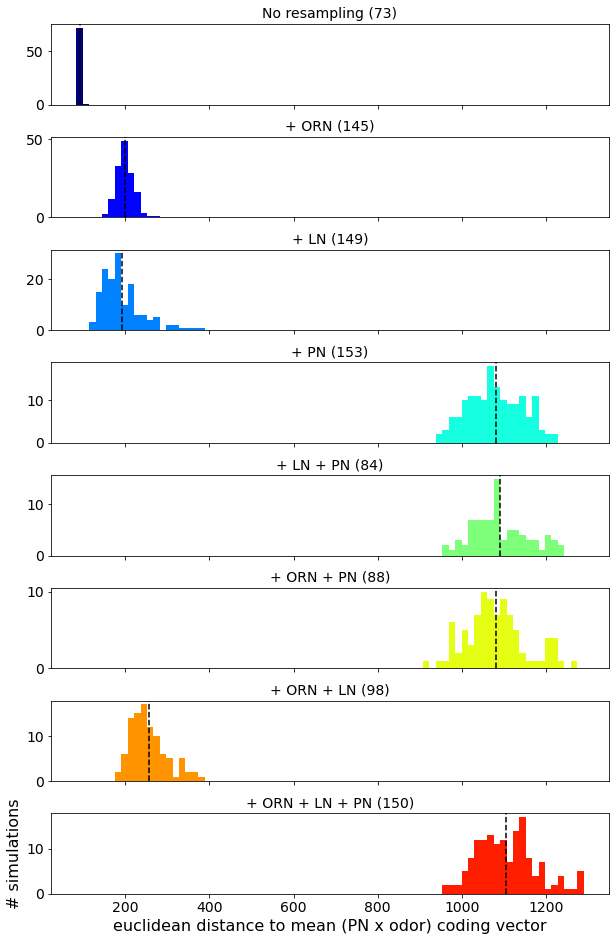

In [37]:
plot_dist_hists(pairwise_pn_individ_by_odor_activity_dists,
                set_names,
                #suptit='all x0.1 eLNs x0.4 iLNs x0.75 PNs x6',
                xlabel=f'pairwise {dist_metric} distance between (PN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_PN_pxo_activity_vecs_resample6.png'))

plot_dist_hists(dists_to_mean_pn_individ_by_odor_activity,
                set_names, dopairs=False,
                xlabel=f'euclidean distance to mean (PN x odor) coding vector',
                figname=os.path.join(resampling_fig_dir,
                                     f'{dist_metric}_to_mean_PN_pxo_activity_vec_resample6.png'))

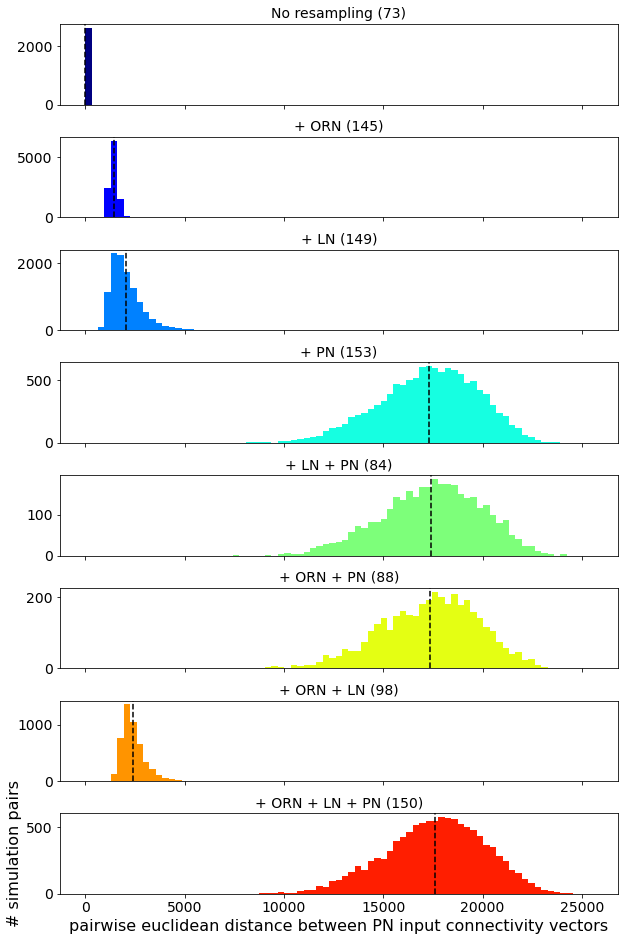

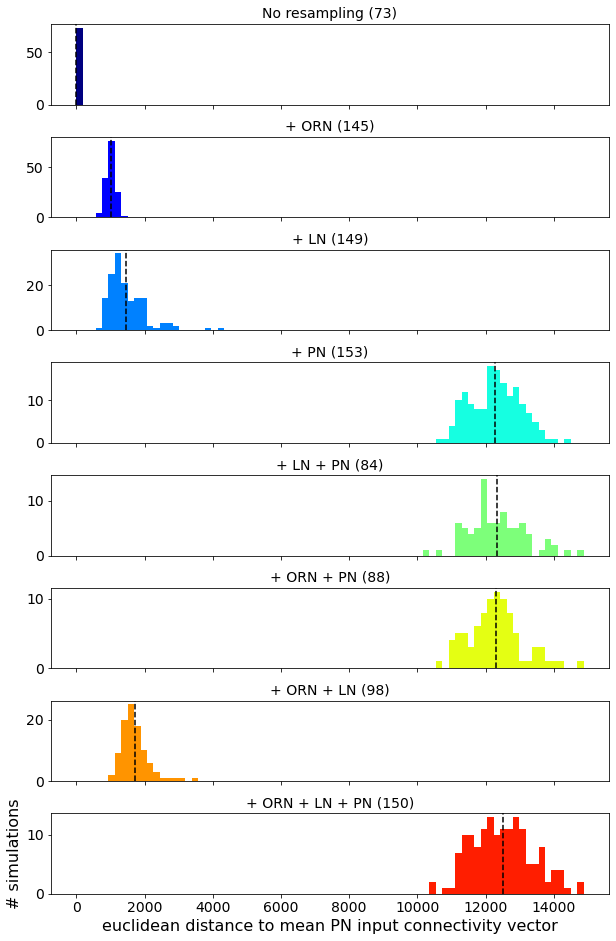

In [64]:
plot_dist_hists(pairwise_pn_input_conmat_dists,
                set_names,
                xlabel=f'pairwise {dist_metric} distance between PN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_PN_inputs_resample6.png'))

plot_dist_hists(dists_to_mean_pn_input_conmat,
                set_names, dopairs=False,
                xlabel=f'{dist_metric} distance to mean PN input connectivity vector',
                figname=os.path.join(resampling_fig_dir,
                                     f'{dist_metric}_to_mean_conmat_PN_inputs_resample6.png'))

C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


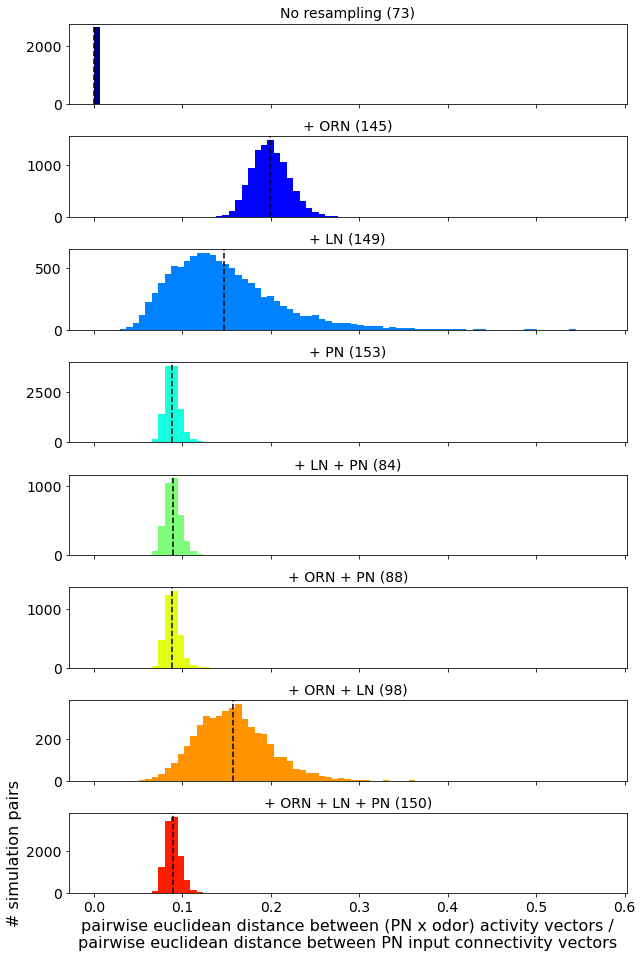

C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


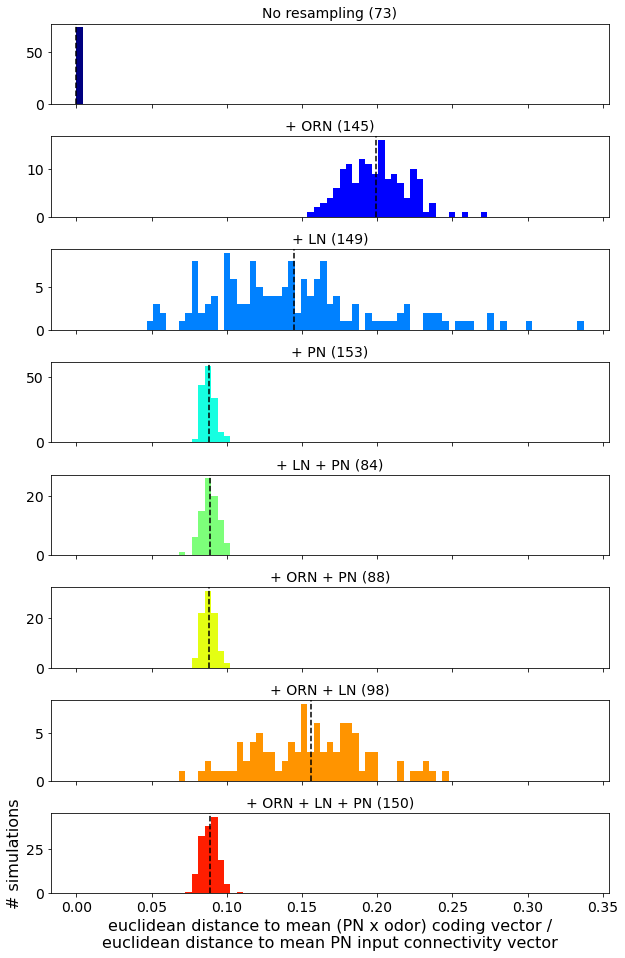

In [38]:
pn_norm_set_dists = [pairwise_pn_individ_by_odor_activity_dists[i]\
           /pairwise_pn_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(pn_norm_set_dists,
                set_names,
                xlabel=f'pairwise {dist_metric} distance between (PN x odor) activity vectors /\n'+\
                    f'pairwise {dist_metric} distance between PN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_PN_activity_vecs_resample6.png'))

pn_norm_set_dists_to_mean = [dists_to_mean_pn_individ_by_odor_activity[i]\
           /dists_to_mean_pn_input_conmat[i] for i in range(len(set_names))]
plot_dist_hists(pn_norm_set_dists_to_mean,
                set_names, dopairs=False,
                xlabel=f'euclidean distance to mean (PN x odor) coding vector /\n'+\
                    f'{dist_metric} distance to mean PN input connectivity vector',
                figname=os.path.join(resampling_fig_dir,
                                     f'{dist_metric}_to_mean_input_conmat_normalized_PN_activity_vec_resample6.png'))

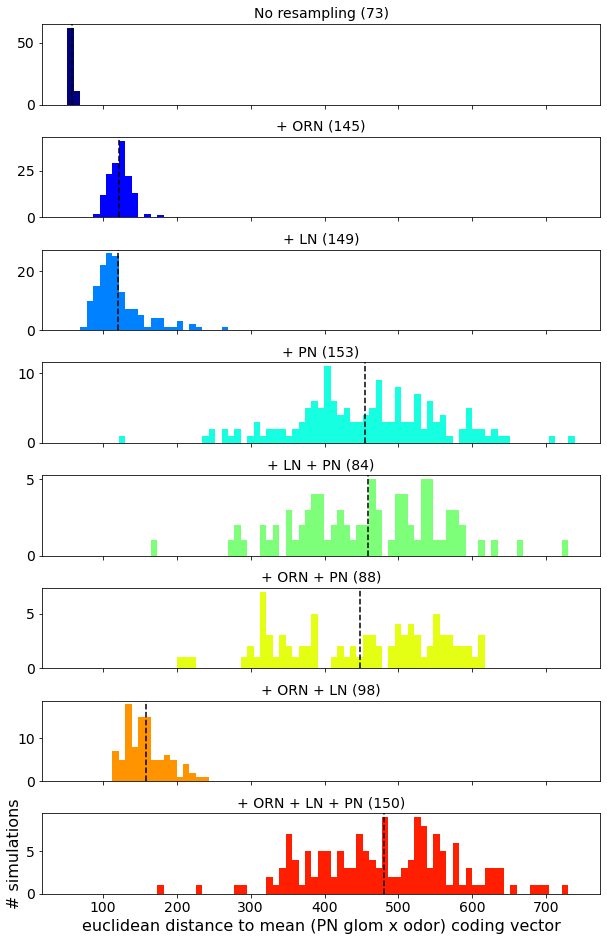

In [62]:
plot_dist_hists(dists_to_mean_pn_glom_by_odor_activity,
                set_names, dopairs=False,
                xlabel=f'euclidean distance to mean (PN glom x odor) coding vector',
                )

In [39]:
all_set_glom_tables = []
for i in range(len(list_of_sets_good_sims)):
    good_set = list_of_sets_good_sims[i]
    print(set_names[i])
    
    set_glom_tables = []
    
    rand_set = good_set
    #rand_set = np.random.choice(good_set, 5, replace=False)
    for k in rand_set:
        d_ind_sim = d_sims[k]
        df_AL_activity = d_ind_sim['df_AL_activity']
               
        df_orn_frs_onoff, df_upn_frs_onoff = make_orn_upn_frs(df_AL_activity, odor_names, df_neur_ids.reset_index(),
                                                  sub_pre=False, olf_only=True)
        df_orn_glom_by_odor_onoff, df_upn_glom_by_odor_onoff= \
                make_glomerular_odor_responses(df_orn_frs_onoff, df_upn_frs_onoff, df_AL_activity)
        
        set_glom_tables.append((df_orn_glom_by_odor_onoff, df_upn_glom_by_odor_onoff))
        
    all_set_glom_tables.append(set_glom_tables)

No resampling
+ ORN
+ LN
+ PN
+ LN + PN
+ ORN + PN
+ ORN + LN
+ ORN + LN + PN


In [58]:
gs = ['DM1', 'DM2', 'DC2']
g_cols = ['C1', 'C0', 'C3']

In [59]:
import matplotlib.patches as mpatches

patches = []
for gj in range(len(gs)):
    patch = mpatches.Patch(color=g_cols[gj], label=gs[gj])
    patches.append(patch)

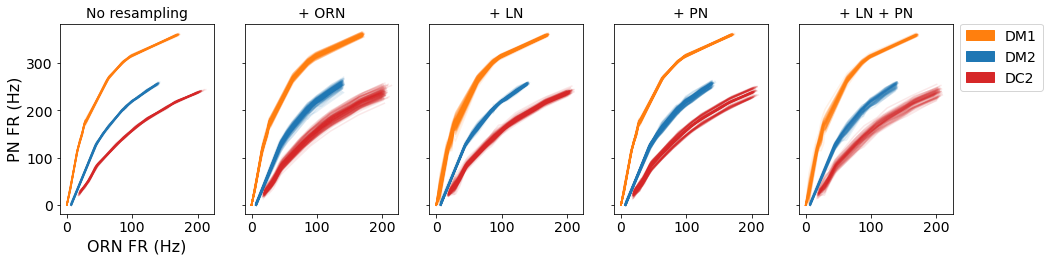

In [60]:
n_sets = 5

fig, axs = plt.subplots(1, n_sets, figsize=(16,3.5), sharex=True, sharey=True)
for i in range(n_sets):
    cur_set = all_set_glom_tables[i]
    for run in cur_set:
        cur_glom_orn_table = run[0]
        cur_glom_pn_table = run[1]
        
        for gj in range(len(gs)):
            g = gs[gj]
            ovals = cur_glom_orn_table.loc[g, odor_names].values
            pvals = cur_glom_pn_table.loc[g, odor_names].values
            o_ordering = np.argsort(ovals)

            axs[i].plot(ovals[o_ordering], pvals[o_ordering], '-', c=g_cols[gj], alpha=0.1)
    
    axs[i].set_title(set_names[i])
    
axs[0].set_xlabel('ORN FR (Hz)')
axs[0].set_ylabel('PN FR (Hz)')

axs[-1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()

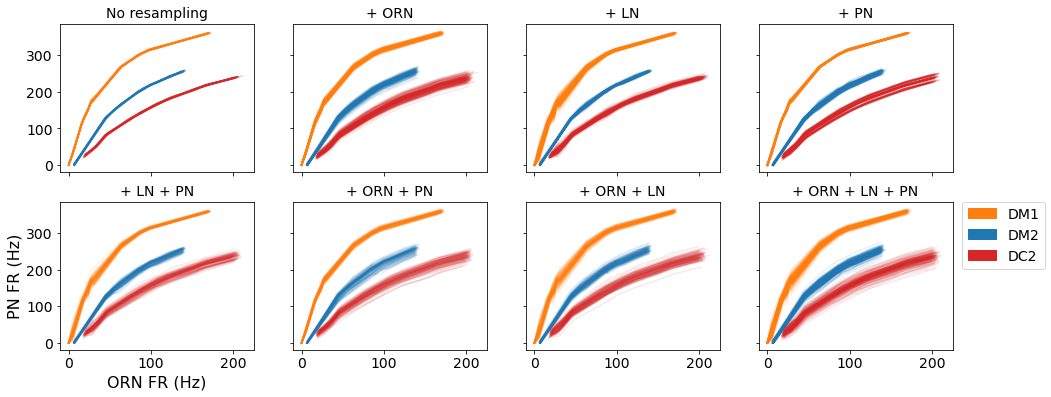

In [61]:
n_sets = 8

fig, axs = plt.subplots(2, 4, figsize=(16,6), sharex=True, sharey=True)
for i in range(n_sets):
    cur_set = all_set_glom_tables[i]
    plot_row = i // 4
    plot_col = i % 4
    for run in cur_set:
        cur_glom_orn_table = run[0]
        cur_glom_pn_table = run[1]
        
        for gj in range(len(gs)):
            g = gs[gj]
            ovals = cur_glom_orn_table.loc[g, odor_names].values
            pvals = cur_glom_pn_table.loc[g, odor_names].values
            o_ordering = np.argsort(ovals)

            axs[plot_row, plot_col].plot(ovals[o_ordering], pvals[o_ordering], '-', c=g_cols[gj], alpha=0.1)
    
    axs[plot_row, plot_col].set_title(set_names[i])
    
axs[-1, 0].set_xlabel('ORN FR (Hz)')
axs[-1, 0].set_ylabel('PN FR (Hz)')

axs[-1, -1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()

In [242]:
def plot_precell_to_pn_block_hist(ax, g, precell='ORN'):
    if precell == 'ORN':
        precell_ids = df_neur_ids[(df_neur_ids.glom == g) & (df_neur_ids.altype == 'ORN')].bodyId.values
    elif precell == 'LN':
        precell_ids = df_neur_ids[df_neur_ids.altype == 'LN'].bodyId.values
    upn_glom_ids = df_neur_ids[(df_neur_ids.glom == g) & (df_neur_ids.altype == 'uPN')].bodyId.values
    precell_to_pn_g_block = al_block.loc[precell_ids, upn_glom_ids]
    n_g_pns = precell_to_pn_g_block.shape[1]
    for igp in range(n_g_pns):
        ax.hist(precell_to_pn_g_block.iloc[:, igp], alpha=0.5, label=f'PN {igp+1}')
    return precell_to_pn_g_block

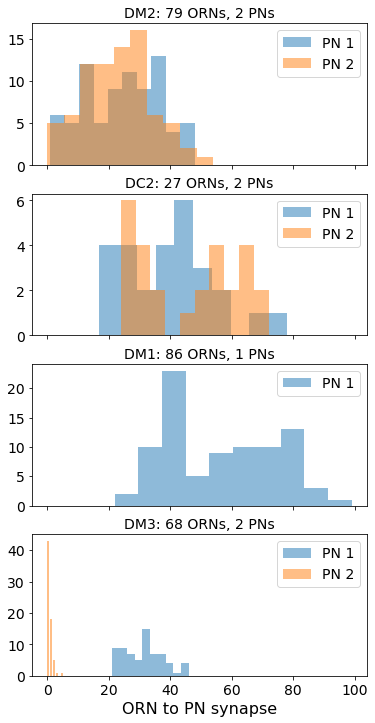

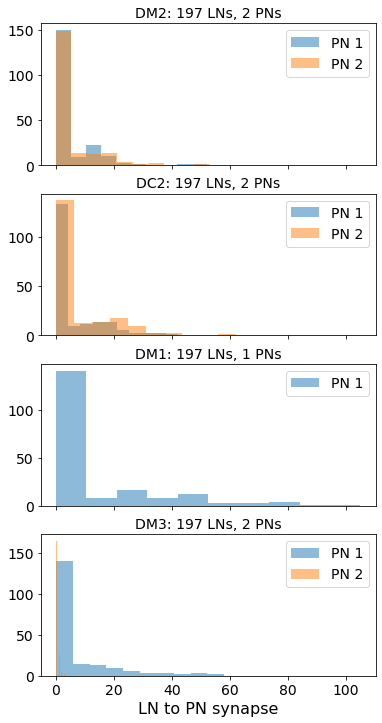

In [264]:
gloms_to_plot = ['DM2', 'DC2', 'DM1', 'DM3']
ng_to_plot = len(gloms_to_plot)
fig, axs = plt.subplots(ng_to_plot, 1, sharex=True, figsize=(6, 3*ng_to_plot))
for i in range(ng_to_plot):
    orn_to_pn_g_block = plot_precell_to_pn_block_hist(axs[i], gloms_to_plot[i], 'ORN')
    axs[i].set_title('{}: {} ORNs, {} PNs'.format(gloms_to_plot[i], *orn_to_pn_g_block.shape))
    axs[i].legend()
axs[-1].set_xlabel('ORN to PN synapse')
plt.show()

fig, axs = plt.subplots(ng_to_plot, 1, sharex=True, figsize=(6, 3*ng_to_plot))
for i in range(ng_to_plot):
    ln_to_pn_g_block = plot_precell_to_pn_block_hist(axs[i], gloms_to_plot[i], 'LN')
    axs[i].set_title('{}: {} LNs, {} PNs'.format(gloms_to_plot[i], *ln_to_pn_g_block.shape))
    axs[i].legend()
axs[-1].set_xlabel('LN to PN synapse')
plt.show()

In [220]:
al_block

,1735391275,1735378225,1735378236,1796761826,1735382530,1735382574,1735386920,1671970212,1735395504,1735395524,...,760250272,417199910,542311358,635407942,1570685224,603349484,1571025824,1694850602,1819326555,481268653
bodyId_pre,,,,,,,,,,,,,,,,,,,,,
1735391275,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1735378225,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1735378236,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1796761826,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1735382530,1.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603349484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1571025824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1694850602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
df_ln_ids = df_neur_ids[df_neur_ids.altype == 'LN']

In [191]:
df_ln_ids.instance

2570          lLN2S(Star)_R
2571               lLN1_c_R
2572          lLN2S(Star)_R
2573    lLN2T_a(Tortuous)_R
2574               lLN1_b_R
               ...         
2762               v2LN32_R
2763               v2LN49_R
2764               l2LN21_R
2765                v2LN5_R
2766               l2LN20_R
Name: instance, Length: 197, dtype: object

In [192]:
df_meta_ln = pd.read_csv(os.path.join(proj_dir, 'datasets/Schlegel2020/S4_hemibrain_ALLN_meta.csv'))

In [218]:
df_ln_ids_merge = df_ln_ids.merge(df_meta_ln[['bodyid', 'anatomy.group']], left_on='bodyId', right_on='bodyid')
df_ln_ids_merge['ln_class'] = [get_LN_class(s) for s in df_ln_ids_merge['anatomy.group']]
df_ln_ids_merge

,bodyId,type,instance,altype,glom,polarity,bodyid,anatomy.group,ln_class
0,1732995501,lLN2S,lLN2S(Star)_R,LN,NaN,0.0,1732995501,l_LN_broad_,broad
1,5813047691,lLN1_c,lLN1_c_R,LN,NaN,0.0,5813047691,l_LN_broad_,broad
2,1640922754,lLN2S,lLN2S(Star)_R,LN,NaN,0.0,1640922754,l_LN_broad_,broad
3,5813032595,lLN2T_a,lLN2T_a(Tortuous)_R,LN,NaN,0.0,5813032595,l_LN_broad_,broad
4,5813078440,lLN1_b,lLN1_b_R,LN,NaN,0.0,5813078440,l_LN_broad_,broad
...,...,...,...,...,...,...,...,...,...
192,1820721562,v2LN32,v2LN32_R,LN,NaN,0.0,1820721562,v2_LN_sparse_bil,sparse
193,2101348562,v2LN49,v2LN49_R,LN,NaN,0.0,2101348562,v2_LN_sparse_,sparse
194,1976565858,l2LN21,l2LN21_R,LN,NaN,0.0,1976565858,l2_LN_sparse_,sparse
195,1883102183,v2LN5,v2LN5_R,LN,NaN,0.0,1883102183,v2_LN_sparse_bil,sparse


In [219]:
df_ln_ids_merge.ln_class.value_counts()

sparse      99
regional    42
broad       42
patchy      14
Name: ln_class, dtype: int64

In [199]:
df_ln_ids_merge['anatomy.group'].value_counts()

v2_LN_sparse_bil          49
l_LN_broad_               37
l_LN_sparse_              19
v2_LN_regional_bil        17
l_LN_regional_            16
l_LN_patchy_              14
v2_LN_sparse_             13
l2_LN_sparse_              7
l_LN_sparse_bil            4
v_LN_regional_             4
v_LN_sparse_               3
l_LN_regional_bil          3
il3_LN_broad_              2
l2_LN_sparse_bil           2
l_LN_broad_bil             2
v2_LN_regional_            2
l2_LN_broad_               1
v2contra_LN_sparse_bil     1
v_LN_sparse_bil            1
Name: anatomy.group, dtype: int64

In [201]:
s = 'v2_LN_sparse_bil'
import re

In [214]:
get_LN_class = lambda  s: re.findall('_LN_(\w+)_[\w+]?', s)[0]

['broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'regional',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'broad',
 'regional',
 'broad',
 'broad',
 'regional',
 'regional',
 'patchy',
 'broad',
 'regional',
 'patchy',
 'regional',
 'regional',
 'patchy',
 'regional',
 'patchy',
 'patchy',
 'regional',
 'broad',
 'patchy',
 'regional',
 'regional',
 'regional',
 'regional',
 'patchy',
 'patchy',
 'patchy',
 'patchy',
 'regional',
 'patchy',
 'regional',
 'patchy',
 'regional',
 'regional',
 'patchy',
 'regional',
 'regional',
 'regional',
 'broad',
 'sparse',
 'patchy',
 'regional',
 'regional',
 'regional',
 'sparse',
 'regional',
 'regional',
 'regional',
 'regional',
 'regional',
 'regional',
 'regional',
 'regional',
 

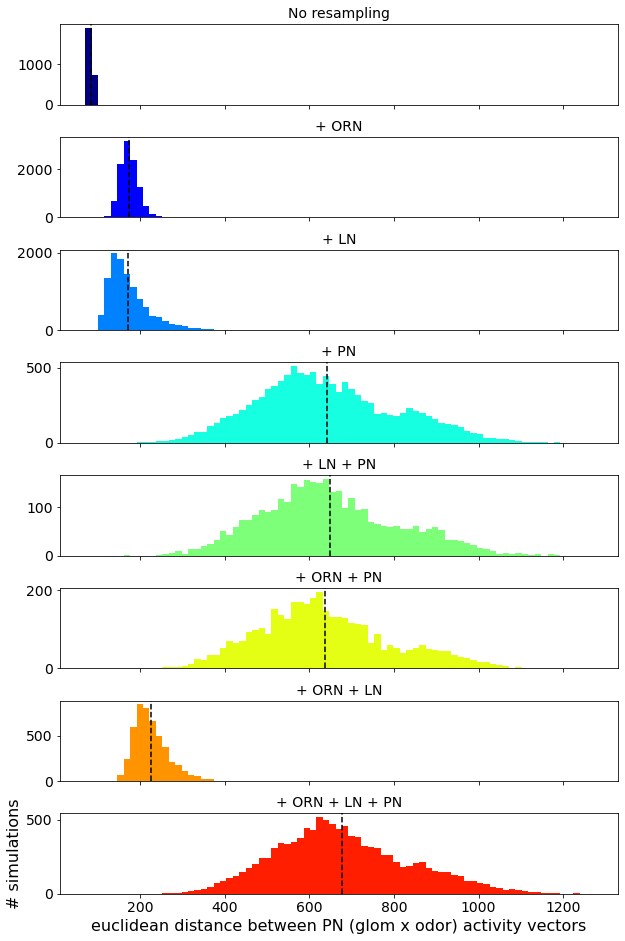

In [43]:
plot_dist_hists(pairwise_pn_glom_by_odor_activity_dists,
                set_names, dopairs=False,
                xlabel=f'{dist_metric} distance between PN (glom x odor) activity vectors',
                )

### plot firing rate activity vector pairwise distances

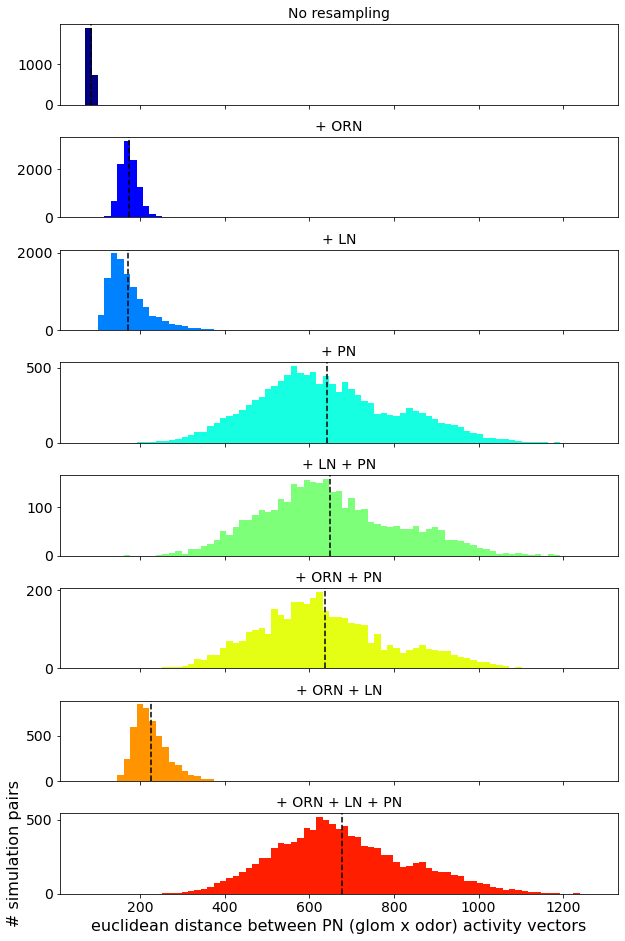

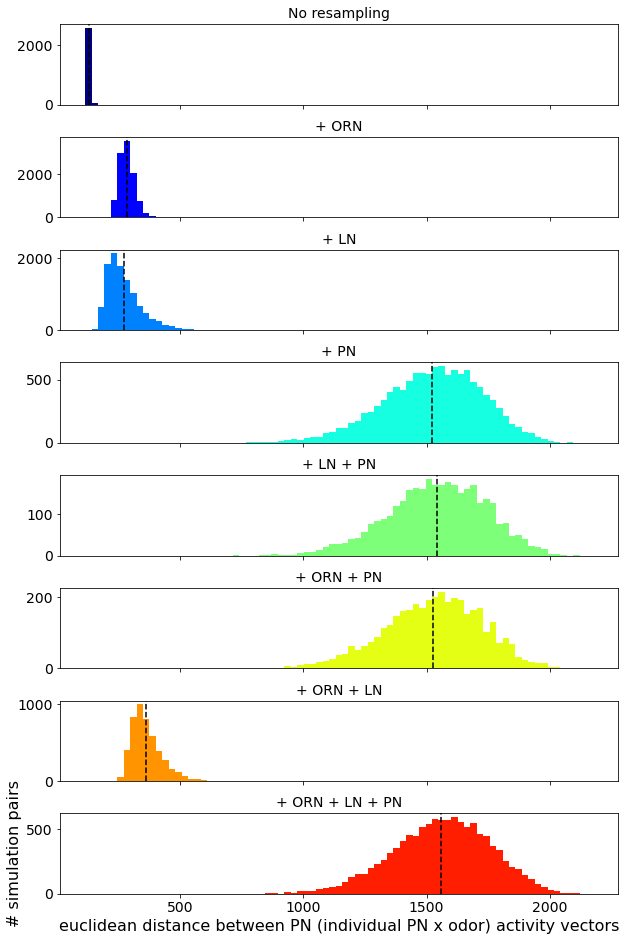

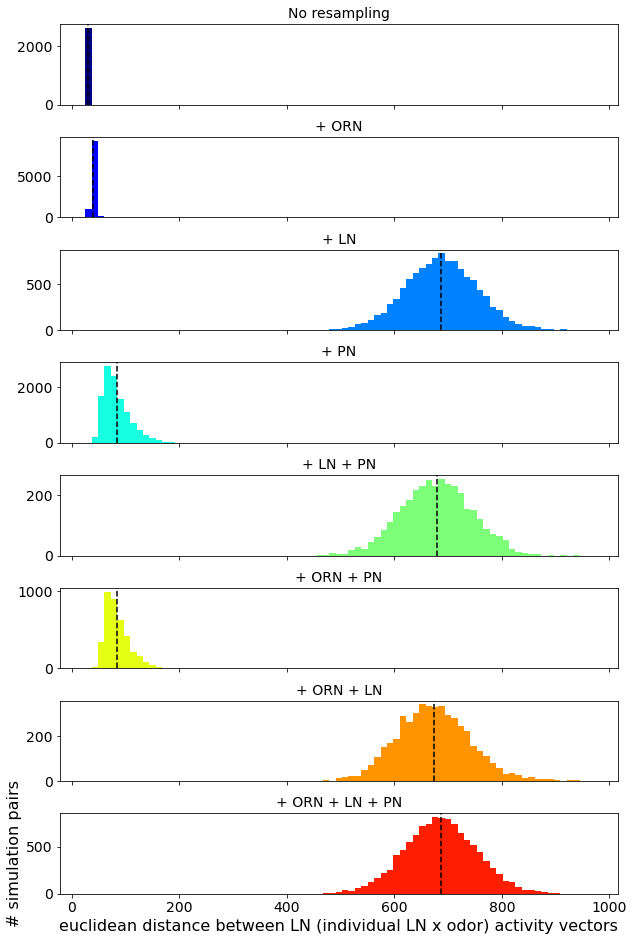

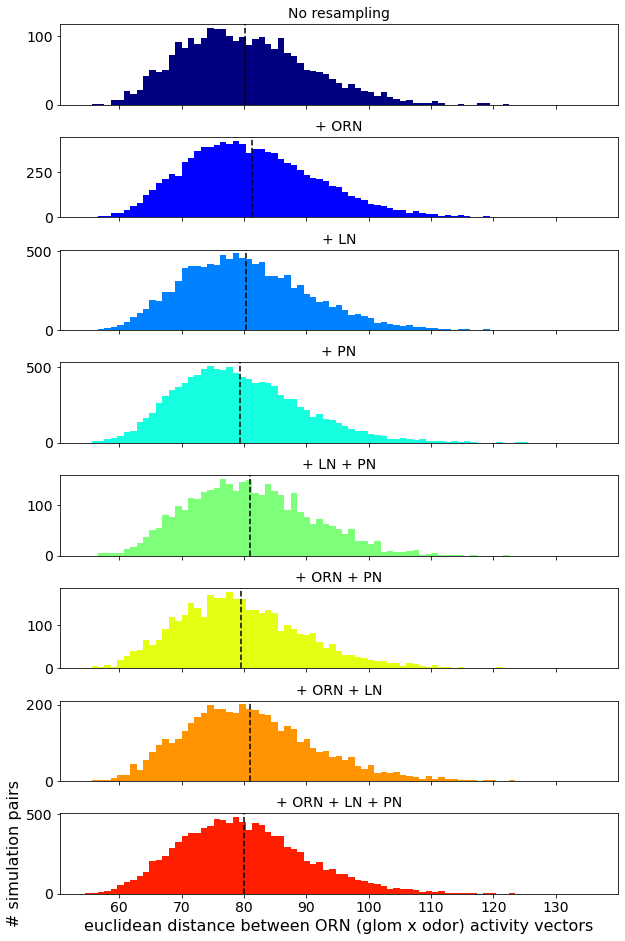

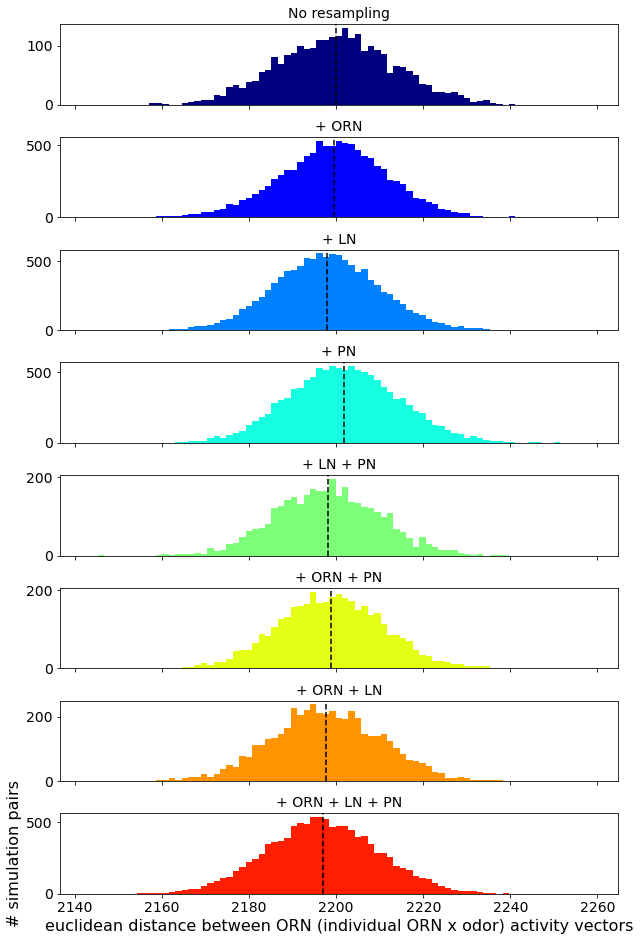

In [44]:
plot_dist_hists(pairwise_pn_glom_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between PN (glom x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_PN_gxo_activity_vecs_resample5.png'))

plot_dist_hists(pairwise_pn_individ_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between PN (individual PN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_PN_pxo_activity_vecs_resample5.png'))


plot_dist_hists(pairwise_ln_individ_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between LN (individual LN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_LN_lxo_activity_vecs_resample5.png'))

plot_dist_hists(pairwise_orn_glom_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between ORN (glom x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_ORN_gxo_activity_vecs_resample5.png'))

plot_dist_hists(pairwise_orn_individ_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between ORN (individual ORN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_ORN_oxo_activity_vecs_resample5.png'))

### plot input connectivity vector pairwise distances

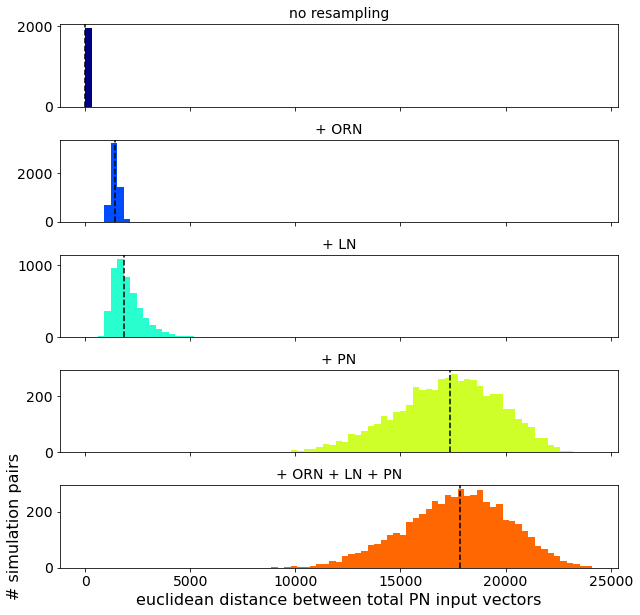

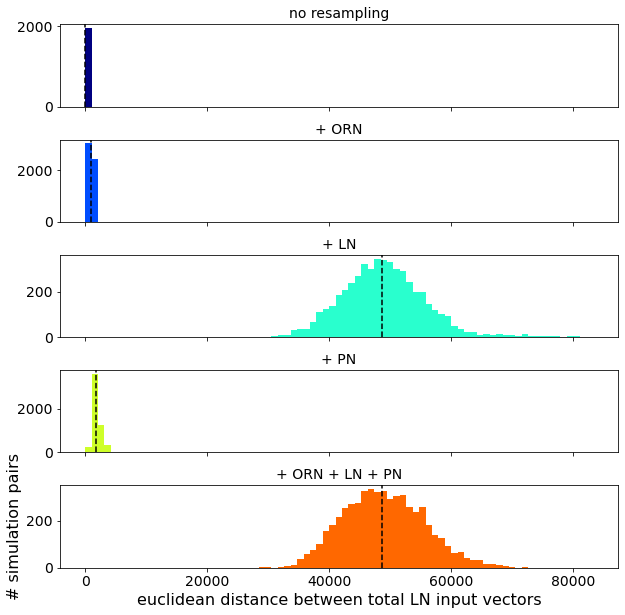

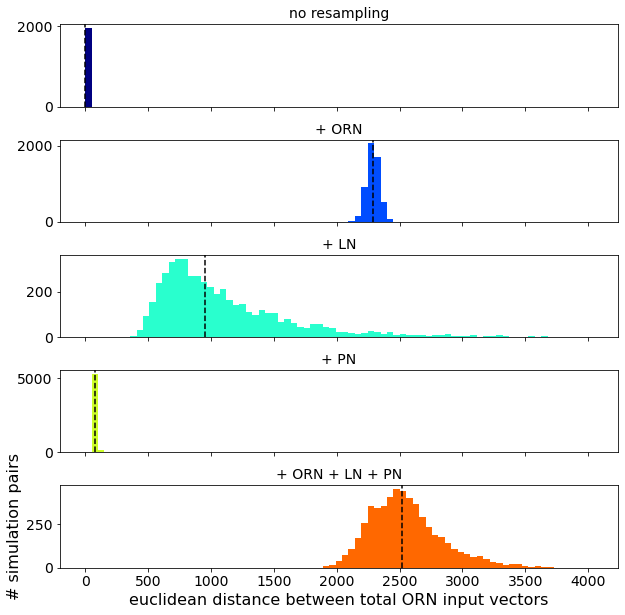

In [34]:
plot_dist_hists(pairwise_pn_input_conmat_dists,
                set_names,
                xlabel=f'{dist_metric} distance between total PN input vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_PN_inputs_resample5.png'))

plot_dist_hists(pairwise_ln_input_conmat_dists,
                set_names,
                xlabel=f'{dist_metric} distance between total LN input vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_LN_inputs_resample5.png'))

plot_dist_hists(pairwise_orn_input_conmat_dists,
                set_names,
                xlabel=f'{dist_metric} distance between total ORN input vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_ORN_inputs_resample5.png'))

## plot activity / connectivity pairwise distances

C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


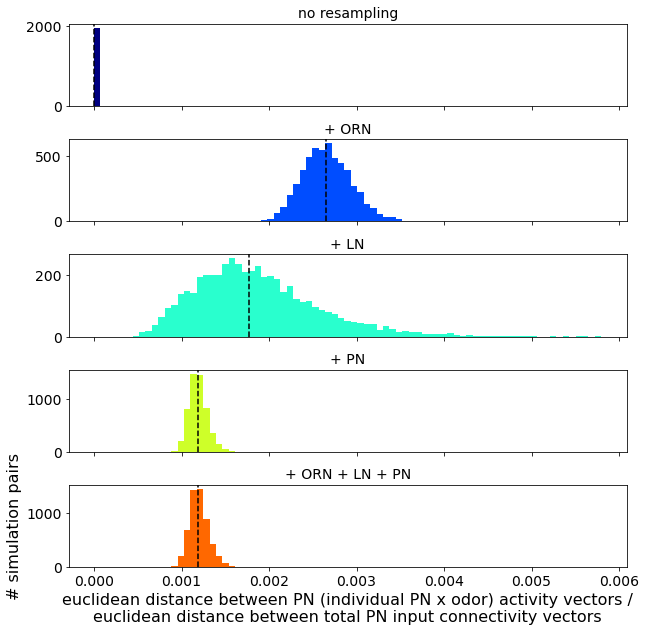

C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


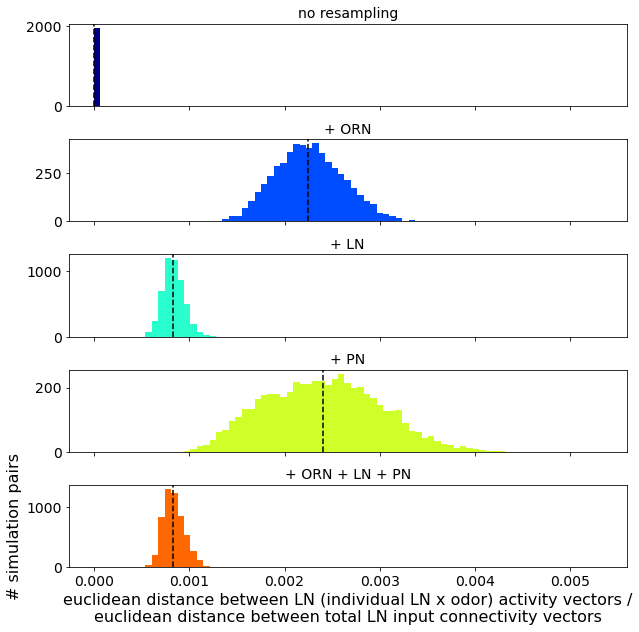

C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


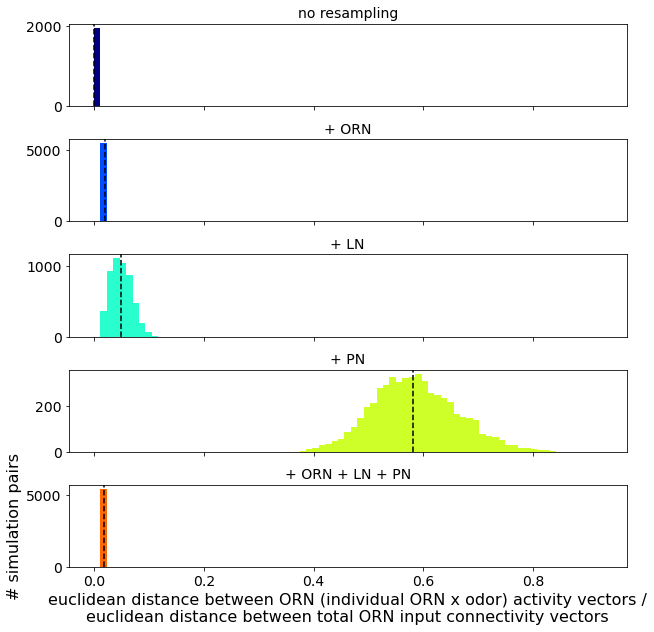

In [35]:
pn_norm_set_dists = [pairwise_pn_individ_by_odor_activity_dists[i]\
           /pairwise_pn_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(pn_norm_set_dists,
                set_names,
                xlabel=f'{dist_metric} distance between PN (individual PN x odor) activity vectors /\n'+\
                    f'{dist_metric} distance between total PN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_PN_activity_vecs_resample5.png'))

ln_norm_set_dists = [pairwise_ln_individ_by_odor_activity_dists[i]\
           /pairwise_ln_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(ln_norm_set_dists,
                set_names,
                xlabel=f'{dist_metric} distance between LN (individual LN x odor) activity vectors /\n'+\
                    f'{dist_metric} distance between total LN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_LN_activity_vecs_resample5.png'))

orn_norm_set_dists = [pairwise_orn_individ_by_odor_activity_dists[i]\
           /pairwise_orn_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(orn_norm_set_dists,
                set_names,
                xlabel=f'{dist_metric} distance between ORN (individual ORN x odor) activity vectors /\n'+\
                    f'{dist_metric} distance between total ORN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_ORN_activity_vecs_resample5.png'))

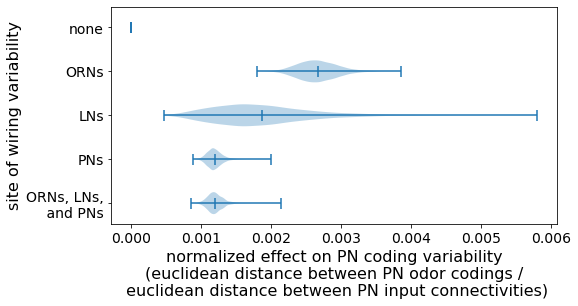

In [37]:
vec = pn_norm_set_dists
which_i = [0, 1, 2, 3, 4][::-1]

labs = ['none',
        'ORNs',
        'LNs', 
        'PNs',
        'ORNs, LNs,\n and PNs'
       ][::-1]
plt.figure(figsize=(8,4))
plt.violinplot([vec[i] for i in which_i], showmeans=True, vert=False)
plt.yticks(1+np.arange(len(which_i)), labs)#, ha='right', rotation=30)
plt.ylabel('site of wiring variability')
plt.xlabel('normalized effect on PN coding variability\n(euclidean distance between PN odor codings /\n euclidean distance between PN input connectivities)')
#plt.savefig('ln_effect_fin.png', dpi=800, bbox_inches='tight')
plt.show()

In [28]:
foo

NameError: name 'foo' is not defined

In [ ]:
foo

In [ ]:
## identify sets in tails

In [ ]:
def get_i_j_from_pairwise_pos(pos_in_pdist, n):
    '''
    # testing
    dat = np.random.normal(0, 1, (13, 80))
    my_pdists = pdist(dat, metric=dist_metric)
    for jk in np.arange(78):
        i_order, j_order = get_i_j_from_pairwise_pos(jk, 13)
        print(my_pdists[jk] == pdist(dat[[i_order, j_order], :], metric=dist_metric)[0])
    '''
    try_pos = 0; i_order = 0; j_order = 0
    while(True):
        addition = n - 1 - i_order
        if try_pos + addition > pos_in_pdist:
            break
        else:
            try_pos += addition
            i_order += 1
    j_order = pos_in_pdist - try_pos + i_order + 1
    return i_order, j_order

In [ ]:
list_of_set_dists = [pairwise_dists[i]/pairwise_conmat_dists[i] for i in range(len(set_names))]
for l in list_of_set_dists:
    l[np.isinf(l)] = 0 # np.nan


min_dist = np.min([np.nanmin(x) for x in list_of_set_dists])
max_dist = np.max([np.nanmax(x) for x in list_of_set_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(8, 1, figsize=(10,16), sharex=True)
for i in range(len(list_of_set_dists)):
    axs[i].hist(list_of_set_dists[i], label=set_names[i], color=cmap(i/8), bins=b)
    axs[i].axvline(np.mean(list_of_set_dists[i]), ls='--', c='k')
    axs[i].set_title(set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance between PN activity vectors /\n{dist_metric} distance between total PN input vectors')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'hist_divide_activity_distance_by_synapse_distance_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
pairwise_conmat_dists

In [ ]:
pairwise_dists

In [ ]:
from scipy import stats

In [ ]:
cmap = cm.get_cmap('jet')

reord = [0,1,2,3,7,6,4,5]

fig, axs = plt.subplots(4, 2, figsize=(12,20), sharex=True, sharey=True)
for i in range(len(set_names)):
    axs[i%4, int(i>=4)].scatter(pairwise_conmat_dists[reord[i]], pairwise_dists[reord[i]], 
                   alpha=0.1, label=set_names[reord[i]], color='k')#cmap(reord[i]/8))
    slope, intercept, r_value, p_value, std_err = stats.linregress(pairwise_conmat_dists[reord[i]], 
                                                                   pairwise_dists[reord[i]], fit_intercept=False)
    axs[i%4, int(i>=4)].set_title(set_names[reord[i]] + ', slope: {:.2f}, r: {:.2f}'.format(slope, r_value))
    
    
    
    #axs[i%4, int(i>=4)].axis('square')
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.subplots_adjust(hspace=0.4)
axs[-1][0].set_ylabel('distance between PN activity vectors')
axs[-1][0].set_xlabel('distance between PN input synapse vectors')
#plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
#plt.savefig(f'scatter_PN_activity_vs_conmat_PN_inputs_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
cmap = cm.get_cmap('jet')

for i in range(len(set_names)):
    plt.figure(figsize=(6,6))
    plt.scatter(pairwise_conmat_dists[i], pairwise_dists[i], 
                   alpha=0.6, label=set_names[i], color=cmap(i/8))
    plt.title(set_names[i])
    plt.show()
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.subplots_adjust(hspace=0.4)
#plt.ylabel('# simulation pairs')
#plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
#plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5.png', dpi=400, bbox_inches='tight')

In [ ]:

        ind_al_block = al_block.copy().loc[ind_df_bodyIds, ind_df_bodyIds]
    

In [ ]:
list_of_pn_glom_tensors_good_set[0].shape

In [ ]:
[x.shape for x in list_of_pn_glom_tensors_good_set]

In [ ]:
tensor_stds = [np.std(cur_tensor, 2) for cur_tensor in list_of_pn_glom_tensors_good_set]
tensor_means = [np.mean(cur_tensor, 2) for cur_tensor in list_of_pn_glom_tensors_good_set]
tensor_cvs = [tensor_stds[i]/tensor_means[i]for i in range(len(list_of_pn_glom_tensors_good_set))]

In [ ]:
plt.figure(figsize=(12,8))
b = np.linspace(0, 6, 100)
plt.hist(tensor_cvs[1].flatten(), label='ORN', alpha=0.6, bins=b)
plt.hist(tensor_cvs[2].flatten(), label='LN', alpha=0.6, bins=b)
plt.hist(tensor_cvs[3].flatten(), label='PN', alpha=0.6, bins=b)
plt.hist(tensor_cvs[0].flatten(), label='None', alpha=0.6, bins=b)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

In [ ]:
cmap = cm.get_cmap('jet')

In [ ]:
list_of_arrays = [x.flatten() for x in tensor_stds]
min_dist = np.min([np.nanmin(x) for x in list_of_arrays])
max_dist = np.max([np.nanmax(x) for x in list_of_arrays])
b = np.linspace(min_dist, max_dist, 100)

fig, axs = plt.subplots(8, 1, figsize=(8,9), sharex=True)
for i in range(8):
    axs[i].hist(list_of_arrays[i], color=cmap(i/8), bins=b)
    axs[i].set_ylabel(set_names[i], rotation=0, ha='right')
plt.show()

In [ ]:
dist_metric = 'euclidean'

pairwise_dists = []
for t in list_of_pn_glom_tensors_good_set:
    #t = t[:75, :, :]
    nsim_in_t, nglom, nodors = t.shape
    t_pdists = pdist(t.reshape((nsim_in_t, nglom*nodors)), metric=dist_metric)
    pairwise_dists.append(t_pdists)

In [ ]:
min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(8, 1, figsize=(10,16), sharex=True)
for i in range(len(list_of_pn_glom_tensors_good_set)):
    axs[i].hist(pairwise_dists[i], label=set_names[i], color=cmap(i/8), bins=b)
    axs[i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
set_names

In [ ]:
new_set_names = ['no resampling',
 'resampled ORNs',
 'resampled LNs',
 'resampled PNs',
 '+ LN + PN',
 '+ ORN + PN',
 '+ ORN + LN',
 'resampled ORNs, LNs, PNs']



min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

mini_set = [0,1,2,3,7]
nplots = len(mini_set)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(5, 1, figsize=(8,8), sharex=True)
for i_i in range(5):
    i = mini_set[i_i]
    axs[i_i].hist(pairwise_dists[i], label=new_set_names[i], color=cmap(i_i/8), bins=b)
    axs[i_i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i_i].set_title(new_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# pairs')
plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'pairwise_dists_resample5_mini.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [1]:
new_set_names = ['no resampling',
 'resampled ORNs',
 'resampled LNs',
 'resampled PNs',
# '+ LN + PN',
# '+ ORN + PN',
# '+ ORN + LN',
 'resampled ORNs, LNs, PNs']



min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

mini_set = [0,1,2,3,7]
nplots = len(mini_set)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(5, 1, figsize=(8,8), sharex=True)
for i_i in range(5):
    i = mini_set[i_i]
    axs[i_i].hist(pairwise_dists[i], label=new_set_names[i], color=cmap(i_i/8), bins=b)
    axs[i_i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i_i].set_title(new_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# pairs')
plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'pdists_resample5_mini.png', dpi=400, bbox_inches='tight')
plt.show()

NameError: name 'np' is not defined

In [ ]:
d_uPN_out = pickle.load(open('pairwise_dists_resample5_uPN_out.p', 'rb'))
d_LN_thermo = pickle.load(open('pairwise_dists_resample5_LN_thermo_extreme.p', 'rb'))

d_uPN_out['set_names'], d_LN_thermo['set_names']

In [ ]:
combined_pairwise_dists = pairwise_dists[:4] \
    + d_uPN_out['dists'] \
    + pairwise_dists[4:] \
    + d_LN_thermo['dists']

combined_set_names = set_names[:4] + \
    ['+ uPN; fixed uPN$\\rightarrow$ORN',
     '+ uPN; fixed uPN$\\rightarrow$LN',
     '+ uPN; fixed uPN$\\rightarrow$uPN',
     '+ uPN; fixed uPN$\\rightarrow$mPN'] + \
    set_names[4:] + \
    ['+ ORN + LN + PN; ++ sensitivity LNs', 
     '+ ORN + LN + PN; -- sensitivity LNs', ]

In [ ]:
min_dist = np.min([np.nanmin(x) for x in combined_pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in combined_pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

nplots = len(combined_pairwise_dists)
fig, axs = plt.subplots(nplots, 1, figsize=(10,2*nplots), sharex=True)
for i in range(nplots):
    axs[i].hist(combined_pairwise_dists[i], label=combined_set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(combined_pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(combined_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.91)
plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5_combined.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
len(combined_pairwise_dists)

In [ ]:
foo

In [ ]:
min_dist = np.min([np.nanmin(x) for x in combined_pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in combined_pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')


mini_set = [0,1,2,3,4]
nplots = len(mini_set)
fig, axs = plt.subplots(nplots, 1, figsize=(10,2*nplots), sharex=True)

for i in mini_set:
    axs[i].hist(combined_pairwise_dists[i], label=combined_set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(combined_pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(combined_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.91)
#plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5_combined_mini.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
all_good_sims = np.concatenate(list_of_sets_good_sims)
all_good_sims_short_names = np.concatenate([[set_names[i]]*len(list_of_sets_good_sims[i])\
                                            for i in range(len(list_of_sets_good_sims))])

In [ ]:
odor_names = ['methyl salicylate', 
    '3-methylthio-1-propanol', 
    '1-butanol',
    '2,3-butanedione',
    '4-methylphenol',
    'isopentyl acetate']

In [ ]:
all_tabs = []
for k in all_good_sims:
    d_ind_sim = d_sims[k]

    df_AL_activity = d_ind_sim['df_AL_activity']
    
    df_orn_activity = df_AL_activity.loc[df_AL_activity.neur_type == 'ORN'].set_index('neur_name')
    df_orn_frs = df_orn_activity.loc[:, (df_orn_activity.columns.str.contains('dur')) | 
                                        (df_orn_activity.columns.str.contains('glom')) ]
    df_orn_frs.columns = odor_names + ['glom']

    df_upn_activity = df_AL_activity.loc[df_AL_activity.neur_type2 == 'uPN'].set_index('neur_name')
    df_upn_frs = df_upn_activity.loc[:, (df_upn_activity.columns.str.contains('dur')) | 
                                        (df_upn_activity.columns.str.contains('glom')) ]
    df_upn_frs.columns = odor_names + ['glom']

    max_fr = max(np.max(np.max(df_orn_frs[odor_names])), np.max(np.max(df_upn_frs[odor_names])))
    
    df_orn_frs_mean_glom = df_orn_frs.groupby('glom').mean()
    gloms_sorted_by_sum_orn_fr = df_orn_frs_mean_glom.sum(1).sort_values(ascending=False).index.values
    df_orn_frs_mean_glom = df_orn_frs_mean_glom.loc[gloms_sorted_by_sum_orn_fr]
    df_orn_frs_std_glom = df_orn_frs.groupby('glom').std().loc[gloms_sorted_by_sum_orn_fr]

    df_upn_frs_mean_glom = df_upn_frs.groupby('glom').mean().loc[gloms_sorted_by_sum_orn_fr]
    df_upn_frs_std_glom = df_upn_frs.groupby('glom').std().loc[gloms_sorted_by_sum_orn_fr]

    df_orn_frs_CV_glom = df_orn_frs_std_glom / df_orn_frs_mean_glom
    df_upn_frs_CV_glom = df_upn_frs_std_glom / df_upn_frs_mean_glom
    
    all_tabs.append(df_upn_frs_mean_glom)

In [ ]:
len(all_tabs)

In [ ]:
df_ex_odor_sims = []
for i in range(len(all_good_sims)):
    sim_name = 'sim_'+all_good_sims_short_names[i][-8:]
    #ex_odor_row = all_tabs[i][ex_odor]
    ex_odor_row = pd.Series(all_tabs[i].T.values.flatten())
    ex_odor_row = (all_tabs[i]
                   .reset_index()
                   .melt('glom', 
                         var_name='odor', 
                         value_name=all_good_sims_short_names[i])
                   .sort_values('odor')
                   .set_index(['odor', 'glom'])
                  )
    ex_odor_row.name = all_good_sims_short_names[i]
    df_ex_odor_sims.append(ex_odor_row)
df_ex_odor_sims = pd.concat(df_ex_odor_sims, 1, sort=False).T

In [ ]:
gloms_ordered_by_mean_odor_FR = df_ex_odor_sims.T.reset_index().groupby('glom').mean().mean(1).sort_values(ascending=False).index.values

In [ ]:
df_ex_ordered = df_ex_odor_sims.copy().T.reset_index()
df_ex_ordered.glom = pd.Categorical(df_ex_ordered.glom, categories=gloms_ordered_by_mean_odor_FR, ordered=True)
df_ex_ordered = df_ex_ordered.sort_values(['odor', 'glom']).set_index(['odor', 'glom']).T

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df_ex_ordered, vmax=max_fr,
            fmt='.0f', cmap='viridis', vmin=0, cbar_kws={'label': 'firing rate (Hz)'})
plt.title('glomerulus-average PN firing rate during {}')
plt.show()

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered.loc[cur_set_name]
    sns.heatmap(cur_df, vmax=max_fr, ax=axs[i], cbar_ax=cbar_ax,
                cmap='viridis', vmin=0, cbar_kws={'label': 'firing rate (Hz)'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional mean PN firing rate vectors, by resampling condition', y=0.91)
plt.savefig('pn_vectors_by_resampling_condition_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

### Vector normalization

In [ ]:
row_means = df_ex_ordered.mean(1)
row_stds = df_ex_ordered.std(1)
df_ex_ordered_rowZ = (df_ex_ordered.T - row_means).T
df_ex_ordered_rowZ = (df_ex_ordered_rowZ.T / row_stds).T

In [ ]:
(df_ex_ordered_rowZ**2).sum(1)

In [ ]:
vec = row_means

min_val = np.min(vec); max_val = np.max(vec)
b = np.linspace(min_val, max_val, 80)

cmap = cm.get_cmap('jet')

nplots = len(set_names)
fig, axs = plt.subplots(nplots, 1, figsize=(10,2*nplots), sharex=True)
for i in range(nplots):
    axs[i].hist(vec.loc[set_names[i]].values, label=set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(vec.loc[set_names[i]]), ls='--', c='k')
    axs[i].set_title(set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulations')
plt.xlabel(f'firing rate (Hz)')
plt.suptitle('row-wise mean per resampling class', y=0.93)
plt.show()

In [ ]:
df_ex_ordered_rowZ

In [ ]:
dist_metric = 'euclidean'

pairwise_dists_from_df_ordered_rowZ = []
for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_rowZ.loc[cur_set_name]
    cur_df_pdists = pdist(cur_df.values, metric=dist_metric)
    pairwise_dists_from_df_ordered_rowZ.append(cur_df_pdists)

In [ ]:
pairwise_dists = pairwise_dists_from_df_ordered_rowZ

min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])
b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

nplots = len(set_names)
fig, axs = plt.subplots(nplots, 1, figsize=(10,16), sharex=True)
for i in range(nplots):
    axs[i].hist(pairwise_dists[i], label=set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(set_names[i])
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) Z-scored mean PN firing rate vectors', y=0.93)
plt.savefig(f'pairwise_{dist_metric}_between_vectors_rowZ_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_rowZ.loc[cur_set_name]
    sns.heatmap(cur_df, ax=axs[i], cbar_ax=cbar_ax, center=0, #vmin=-3, vmax=3,
                cmap='bwr',  cbar_kws={'label': 'row-wise Z score'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    #axs[i].set_xticklabels(df_ex_ordered_Z.columns, size=2, rotation=90)
    #axs[i].locator_params(nbins=cur_df.shape[1], axis='x')
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional Z-scored mean PN firing rate vectors, by resampling condition', y=0.91)
plt.savefig('pn_vectors_by_resampling_condition_rowZ_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_rowZ.loc[cur_set_name]
    sns.heatmap(cur_df, ax=axs[i], cbar_ax=cbar_ax, center=0, vmin=-2, vmax=2,
                cmap='bwr',  cbar_kws={'label': 'row-wise Z score'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    #axs[i].set_xticklabels(df_ex_ordered_Z.columns, size=2, rotation=90)
    #axs[i].locator_params(nbins=cur_df.shape[1], axis='x')
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional Z-scored mean PN firing rate vectors, by resampling condition', y=0.91)
plt.savefig('pn_vectors_by_resampling_condition_rowZ_thresh_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
#df_gloms_num_neurs = pd.read_csv('df_gloms_num_neurs.csv', index_col=0)

In [ ]:
df_ex_ordered

In [ ]:
df_all = df_ex_ordered.copy().loc['+ PN']#.loc['+ ORN + LN + PN']
df_all_colZ = (df_all - df_all.mean(0))/df_all.std(0)

In [ ]:
df_all_colwise = df_all.std(0) / df_all.mean(0)
s_metric = 'CV PN firing rate'

In [ ]:
df_all_glom_odor_colwise = df_all_colwise.reset_index().pivot('odor', 'glom', 0)
df_all_glom_avg = df_all_glom_odor_colwise.mean(0)


plt.figure(figsize=(15,2))
sns.heatmap(df_all_glom_odor_colwise, annot=True, fmt='.2f', annot_kws={'fontsize': 8, 'rotation': 0},
            cmap='jet', xticklabels=True)
plt.show()

plt.figure(figsize=(15,2))
sns.heatmap(pd.DataFrame(df_all_glom_avg).T, annot=True, fmt='.2f', annot_kws={'fontsize': 8, 'rotation': 90},
            cmap='jet', xticklabels=True)
plt.show()

In [ ]:
df_all_glom_avg_num_neurs_merge = df_all_glom_avg.reset_index().merge(df_gloms_num_neurs.reset_index())

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
axs[0].plot(df_all_glom_avg_num_neurs_merge['num_orns'], df_all_glom_avg_num_neurs_merge[0], 'o')
axs[1].plot(df_all_glom_avg_num_neurs_merge['num_pns'], df_all_glom_avg_num_neurs_merge[0], 'o')
axs[0].set_xlabel('# ORNs / glom'); axs[1].set_xlabel('# PNs / glom')
axs[0].set_ylabel(s_metric)
plt.show()

In [ ]:
df_all_col_CVs = df_all.std(0)
df_all_glom_odor_CVs = df_all_col_CVs.reset_index().pivot('odor', 'glom', 0)

plt.figure(figsize=(15,2))
sns.heatmap(df_all_glom_odor_CVs, cmap='jet', xticklabels=True)
plt.show()

In [ ]:
df_all_glom_odor_CVs

In [ ]:
df_all_colZ

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df_all_colZ, cmap='bwr', center=0, xticklabels=True)
plt.xticks(fontsize=4)
plt.show()

In [ ]:
ddf = df_ex_ordered.loc['+ PN'].iloc[:, :40]
plt.figure(figsize=(12,6))
sns.heatmap(ddf, xticklabels=True, cmap='viridis',
            cbar_kws={'label': 'mean glom PN firing rate (Hz)'})
plt.yticks([])
plt.ylabel('+ PN resample')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
#plt.savefig('zoom_in_to_PNblock.png')
plt.show()

In [ ]:
ddf_colZ = (ddf - ddf.mean(0))/ddf.std(0)
plt.figure(figsize=(12,6))
sns.heatmap(ddf_colZ, cmap='bwr', center=0)
plt.show()

In [ ]:
ddf_colZ.mean(0)

In [ ]:
from utils.data_utils_hemi import df_char_ids

In [ ]:
'''
pairwise_dists_from_df_blockZ = []
for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered.loc[cur_set_name]
    cur_df_blockZ = (cur_df - cur_df.mean(0)) / cur_df.std(0)
    cur_df_blockZ_pdists = pdist(cur_df_blockZ.values, metric=dist_metric)
    pairwise_dists_from_df_blockZ.append(cur_df_blockZ_pdists)
'''

In [ ]:
#df_ex_ordered_Z = df_ex_ordered - df_ex_ordered.mean(0)
#df_ex_ordered_Z = df_ex_ordered_Z / df_ex_ordered.std(0)
#df_ex_ordered_Z

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_Z.loc[cur_set_name]
    sns.heatmap(cur_df, ax=axs[i], cbar_ax=cbar_ax, center=0, vmin=-3, vmax=3,
                cmap='bwr',  cbar_kws={'label': 'row-wise Z scored firing rate (Hz)'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    #axs[i].set_xticklabels(df_ex_ordered_Z.columns, size=2, rotation=90)
    #axs[i].locator_params(nbins=cur_df.shape[1], axis='x')
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional mean PN firing rate vectors, by resampling condition', y=0.91)
#plt.savefig('pn_vectors_by_resampling_condition_Z_scores_resample4.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
df_ex_ordered

In [ ]:
tt = list_of_pn_glom_tensors_good_set[0]


tt.shape

In [ ]:
tt = list_of_pn_glom_tensors_good_set[0]
nsim_in_t, nglom, nodors = tt.shape
tt_flat = tt.reshape((nsim_in_t, nglom*nodors))
tt_flat

In [ ]:
tt_flat.shape

In [ ]:
tt_flat.shape

In [ ]:
cur_set_name = set_names[0]
df_ex_ordered_Z = df_ex_ordered #- df_ex_ordered.mean(0)
#df_ex_ordered_Z = df_ex_ordered_Z / df_ex_ordered.std(0)
cur_df = df_ex_ordered_Z.loc[cur_set_name]
cur_df

In [ ]:
 tt_flat.mean(1)

In [ ]:
np.mean(tt, 1).shape

In [ ]:
dist_metric = 'euclidean'

pairwise_dists_rowZ = []
for t in list_of_pn_glom_tensors_good_set:
    #t = t[:75, :, :]
    nsim_in_t, nglom, nodors = t.shape
    t_pdists = pdist(t.reshape((nsim_in_t, nglom*nodors)), metric=dist_metric)
    pairwise_dists_rowZ.append(t_pdists)

In [ ]:
cur_df.shape[1]

In [ ]:
num_ticks = 1000
# the index of the position of yticks
xticks = np.linspace(0, cur_df.shape[1] - 1, num_ticks, dtype=np.int)
# the content of labels of these yticks
xticklabels = [cur_df.columns[idx] for idx in xticks]

plt.figure(figsize=(12,4))
ax = sns.heatmap(cur_df, center=0, vmin=-3, vmax=3, cmap='bwr', xticklabels=xticklabels)
#plt.locator_params(nbins=200, axis='x', tight=True)
ax.set_xticks(np.arange(cur_df.shape[1]))
ax.set_xticklabels(cur_df.columns, size=4)
plt.show()